In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from google.colab import files
data= files.upload()

Saving QVI_data.csv to QVI_data.csv


In [3]:
df=pd.read_csv("QVI_data.csv")
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,17-10-2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,16-09-2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,07-03-2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,08-03-2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,02-11-2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.shape

(264834, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])
cat_col=['BRAND','LIFESTAGE',"PREMIUM_CUSTOMER"]
for col in cat_col:
  df[col]=df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  category      
 10  LIFESTAGE         264834 non-null  category      
 11  PREMIUM_CUSTOMER  264834 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 18.9+ MB


/tmp/ipython-input-6-4119422855.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE'] = pd.to_datetime(df['DATE'])


In [7]:
df.isnull().sum()

,0
LYLTY_CARD_NBR,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND,0


In [8]:
# checking unique entitites
for col in df.columns:
  print(col, "=", df[col].nunique())

LYLTY_CARD_NBR = 72636
DATE = 364
STORE_NBR = 272
TXN_ID = 263125
PROD_NBR = 114
PROD_NAME = 114
PROD_QTY = 5
TOT_SALES = 111
PACK_SIZE = 21
BRAND = 21
LIFESTAGE = 7
PREMIUM_CUSTOMER = 3


In [9]:
df.duplicated().sum()
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648330e+05,264833,264833.000000,2.648330e+05,264833.000000,264833.000000,264833.000000,264833.000000
mean,1.355489e+05,2018-12-30 00:52:39.666657536,135.079529,1.351577e+05,56.583598,1.905812,7.299351,182.425540
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,2018-09-30 00:00:00,70.000000,6.760000e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,2018-12-30 00:00:00,130.000000,1.351370e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,2019-03-31 00:00:00,203.000000,2.027000e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,8.058003e+04,NaN,76.784189,7.813305e+04,32.826498,0.343437,2.527244,64.325268


**METRICS FOR ANALYSIS**

In [12]:
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m')

df_monthly_sales = df.groupby(['STORE_NBR', 'YEARMONTH']).agg(
    total_sales_revenue=('TOT_SALES', 'sum'),
    total_customers=('LYLTY_CARD_NBR', 'nunique'),
    total_transactions=('TXN_ID', 'nunique'),
    total_units=('PROD_QTY', 'sum')
).reset_index()


# Calculate derived metrics
df_monthly_sales['trans_per_customer'] = df_monthly_sales['total_transactions'] / df_monthly_sales['total_customers']
df_monthly_sales['chips_per_trans'] = df_monthly_sales['total_units'] / df_monthly_sales['total_transactions']
df_monthly_sales['avg_price_per_unit'] = df_monthly_sales['total_sales_revenue'] / df_monthly_sales['total_units']

df_monthly_sales_filtered = df_monthly_sales[df_monthly_sales['YEARMONTH'] < '201902']

stores_with_full_obs = df_monthly_sales_filtered.groupby('STORE_NBR')['YEARMONTH'].nunique().reset_index()
stores_with_full_obs.rename(columns={'YEARMONTH':'month_count'},inplace=True)

stores_with_full_obs

,STORE_NBR,month_count
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
...,...,...
266,268,7
267,269,7
268,270,7
269,271,7


**FUNCTION TO FIND CONTROL STORES**

In [13]:
def compute_correlations(df, trial_store, control_stores, metric):
    df = df.copy()
    df['YEARMONTH'] = pd.to_datetime(df['YEARMONTH'], format='%Y%m')
    pivot = df.pivot(index='YEARMONTH', columns='STORE_NBR', values=metric)

    if trial_store not in pivot.columns:
        return pd.DataFrame()

    correlations = []
    for control in control_stores:
        if control in pivot.columns:
            valid = pivot[[trial_store, control]].dropna()
            n = len(valid)
            if n >= 2 and valid[trial_store].nunique() > 1 and valid[control].nunique() > 1:
                corr, _ = stats.pearsonr(valid[trial_store], valid[control])
            else:
                corr = None
            correlations.append((trial_store, control, metric, corr, n))
        else:
            correlations.append((trial_store, control, metric, None, 0))

    return pd.DataFrame(correlations, columns=['trial_store', 'control_store', 'metric', 'pearson_correlation', 'data_points'])

def get_best_controls(df, trial_stores, control_stores, metrics):
    all_corrs = pd.concat([
        compute_correlations(df, trial, control_stores, metric)
        for trial in trial_stores for metric in metrics
    ], ignore_index=True)

    all_corrs['pearson_correlation'] = all_corrs['pearson_correlation'].fillna(0)

    summed_corrs = (
        all_corrs.groupby(['trial_store', 'control_store'])['pearson_correlation']
        .sum().reset_index()
    )

    return summed_corrs.loc[summed_corrs.groupby('trial_store')['pearson_correlation'].idxmax()].reset_index(drop=True)


trial_stores = [77, 86, 88]
control_stores = [s for s in range(1, 271) if s not in trial_stores]
metrics = ['total_sales_revenue', 'total_customers', 'trans_per_customer', 'total_units']

best_controls = get_best_controls(df_monthly_sales_filtered, trial_stores, control_stores, metrics)

print("\nBest Control Store Candidates Based on Sum of Correlations Across Metrics:")
print(best_controls)



Best Control Store Candidates Based on Sum of Correlations Across Metrics:
   trial_store  control_store  pearson_correlation
0           77            119             3.628596
1           86            138             2.947471
2           88            178             2.730981


**INSIGHTS:**

1. Compared trial stores with candidate control stores across 4 key metrics:
Total sales revenue,
Total customers,
Transactions per customer,
Total units sold.

2. Calculated Pearson correlations of monthly data before trial start.

3. Summed correlations across metrics to find overall best matches.

4. Best control stores identified:

     Trial Store 77 → Control Store 119 (sum correlation ≈ 3.63)

     Trial Store 86 → Control Store 138 (sum correlation ≈ 2.95)

     Trial Store 88 → Control Store 178 (sum correlation ≈ 2.73)

5. These control stores show strongest similarity to trial stores’ sales trends and are ideal for comparison in experiments.


Selected control store for trial store 77: 119


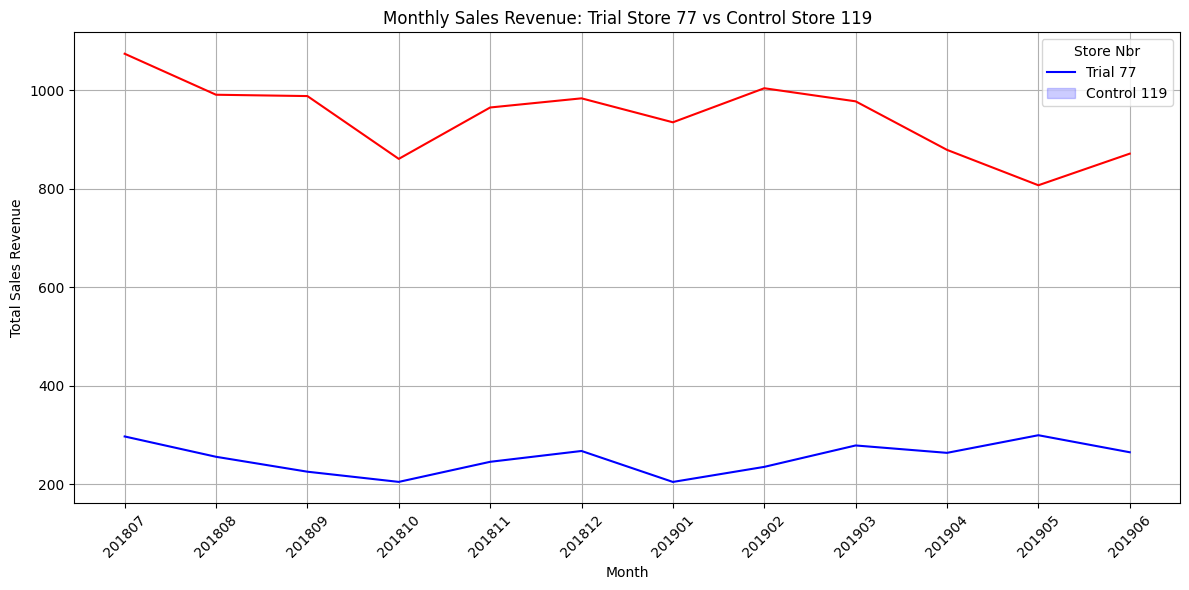

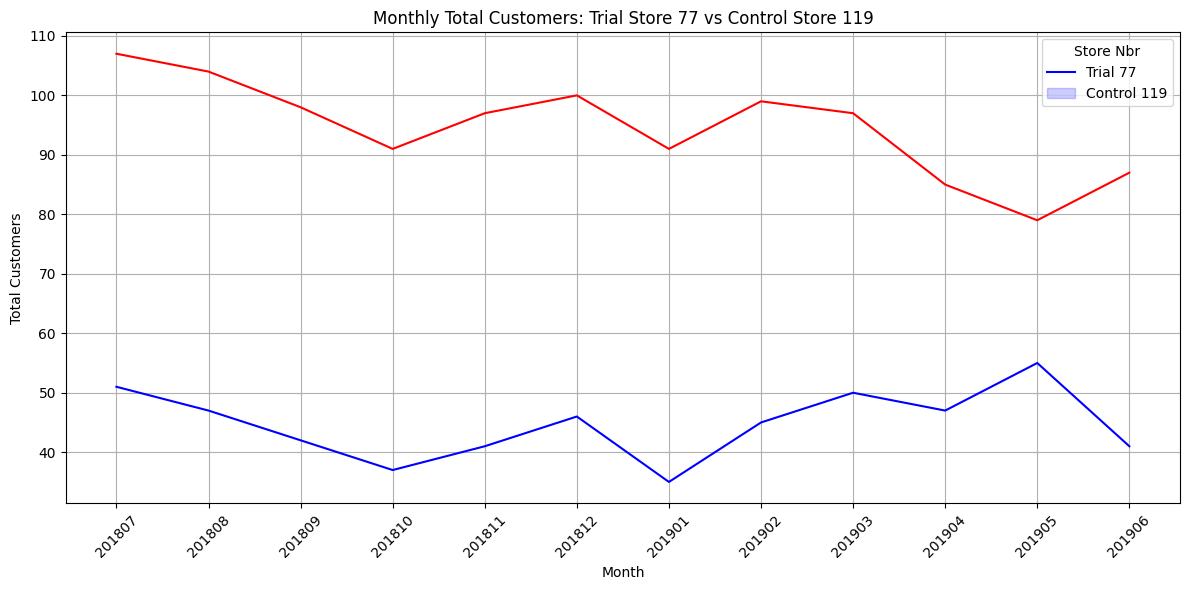

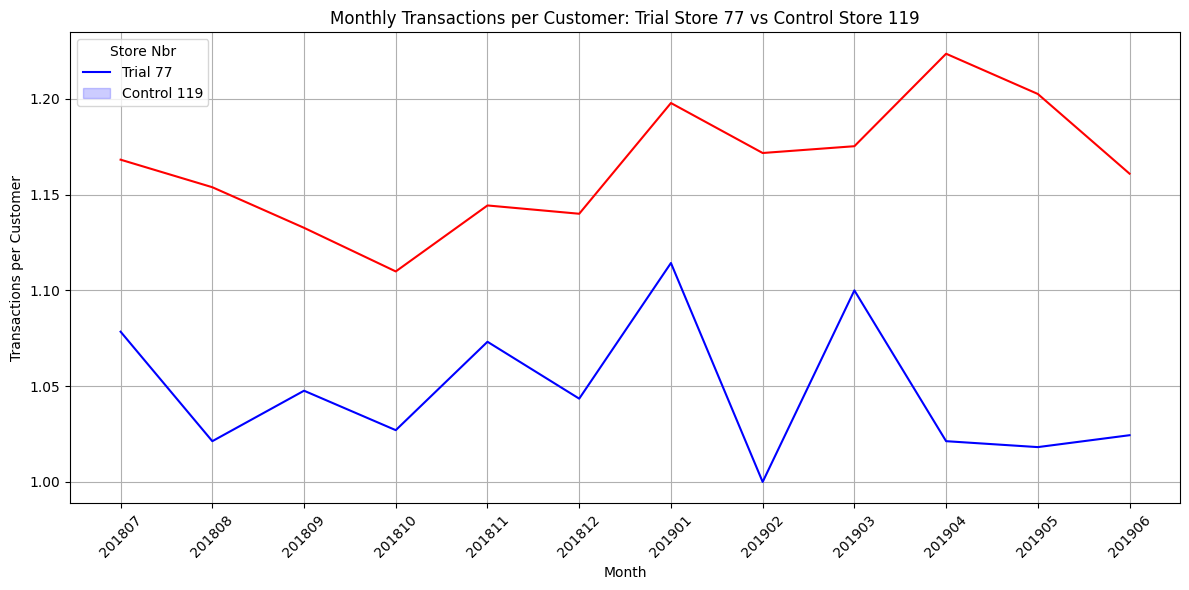

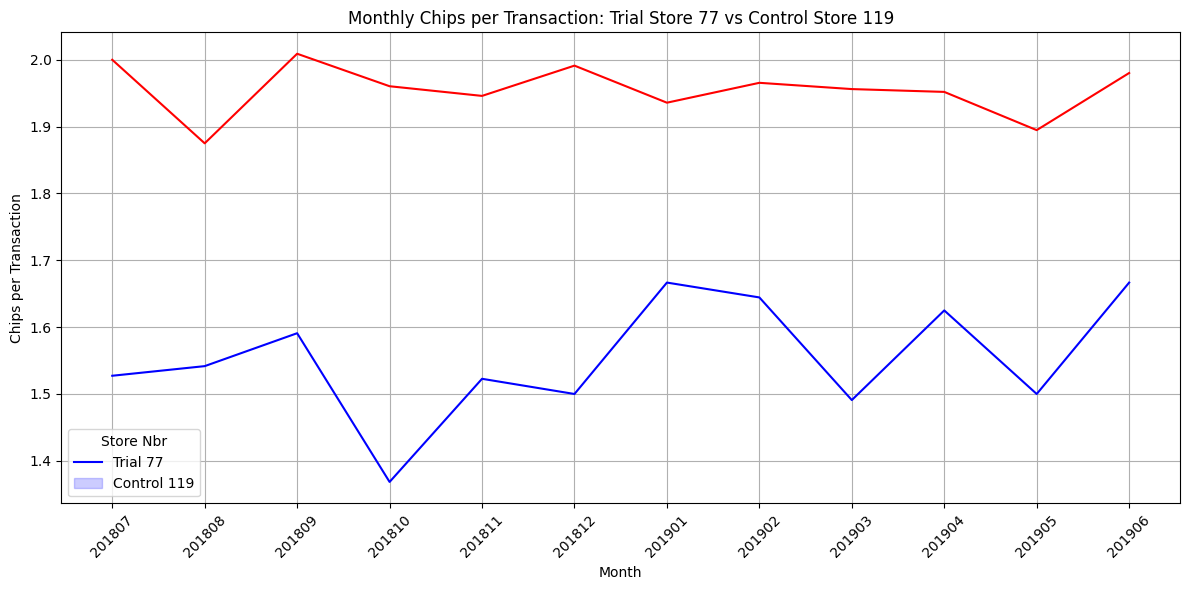

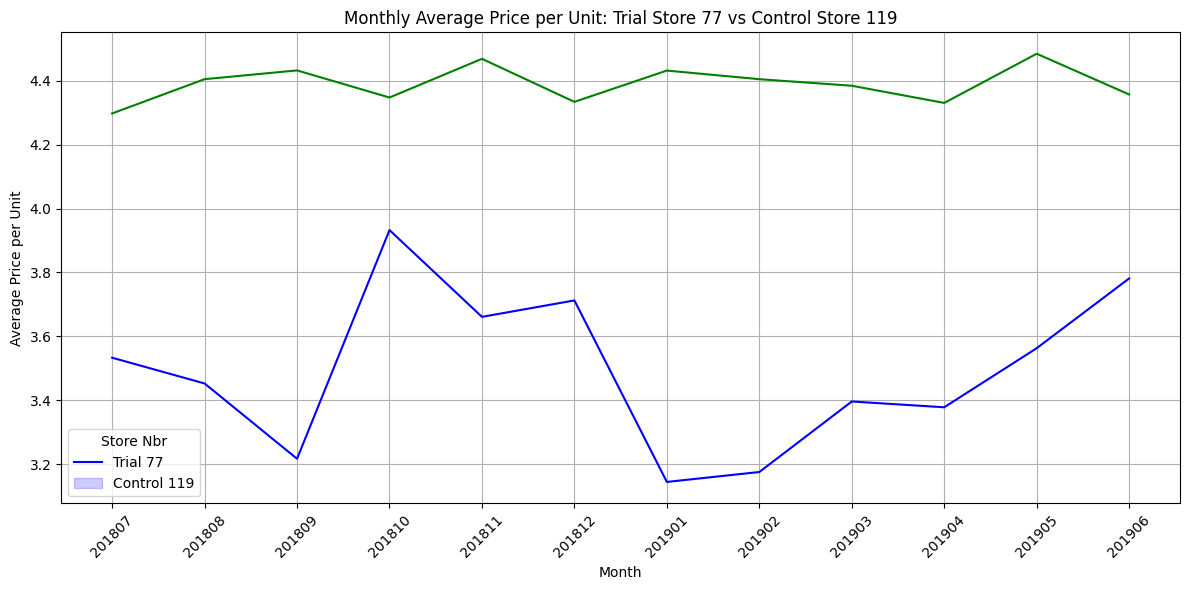

In [14]:
# Extract the best control store for trial store 77 from the final_best_controls DataFrame

control_store_77 = best_controls[best_controls['trial_store'] == 77]['control_store'].iloc[0]
print(f"\nSelected control store for trial store 77: {control_store_77}")

# Filter the DataFrame to include only the trial store and the selected control store
df_viz_77 = df_monthly_sales[df_monthly_sales['STORE_NBR'].isin([77, control_store_77])].copy()

# Visual comparison of the selected trial store and its control store for sales revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_77, x='YEARMONTH', y='total_sales_revenue', hue='STORE_NBR',
             palette={77: 'blue', control_store_77: 'red'})
plt.title(f'Monthly Sales Revenue: Trial Store 77 vs Control Store {control_store_77}')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 77', f'Control {control_store_77}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for total customers
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_77, x='YEARMONTH', y='total_customers', hue='STORE_NBR',
             palette={77: 'blue', control_store_77: 'red'})
plt.title(f'Monthly Total Customers: Trial Store 77 vs Control Store {control_store_77}')
plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 77', f'Control {control_store_77}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for transactions per customer
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_77, x='YEARMONTH', y='trans_per_customer', hue='STORE_NBR',
             palette={77: 'blue', control_store_77: 'red'})
plt.title(f'Monthly Transactions per Customer: Trial Store 77 vs Control Store {control_store_77}')
plt.xlabel('Month')
plt.ylabel('Transactions per Customer')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 77', f'Control {control_store_77}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for chips per transaction
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_77, x='YEARMONTH', y='chips_per_trans', hue='STORE_NBR',
             palette={77: 'blue', control_store_77: 'red'})
plt.title(f'Monthly Chips per Transaction: Trial Store 77 vs Control Store {control_store_77}')
plt.xlabel('Month')
plt.ylabel('Chips per Transaction')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 77', f'Control {control_store_77}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for average price per unit
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_77, x='YEARMONTH', y='avg_price_per_unit', hue='STORE_NBR',
             palette={77: 'blue', control_store_77: 'green'})
plt.title(f'Monthly Average Price per Unit: Trial Store 77 vs Control Store {control_store_77}')
plt.xlabel('Month')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 77', f'Control {control_store_77}'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Calculate the scaling factor based on the ratio of pre-trial total sales revenue between the trial and control stores
# Filter for the pre-trial period (before Feb 2019)
df_pre_trial_77 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == 77) &
    (df_monthly_sales['YEARMONTH'] < '201902')
].copy()

df_pre_trial_control_77 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == control_store_77) &
    (df_monthly_sales['YEARMONTH'] < '201902')
].copy()

# Calculate the sum of sales revenue for the pre-trial period for both stores
pre_trial_sales_77 = df_pre_trial_77['total_sales_revenue'].sum()
pre_trial_sales_control_77 = df_pre_trial_control_77['total_sales_revenue'].sum()

# Calculate the scaling factor
scaling_factor = pre_trial_sales_77 / pre_trial_sales_control_77

# Apply the scaling factor to the control store's total sales revenue for all months
df_monthly_sales['scaled_total_sales_revenue'] = df_monthly_sales.apply(
    lambda x: x['total_sales_revenue'] * scaling_factor if x['STORE_NBR'] == control_store_77 else x['total_sales_revenue'],
    axis=1
)

# Calculate scaling factor and scaled columns for total customers
pre_trial_customers_77 = df_pre_trial_77['total_customers'].sum()
pre_trial_customers_control_77 = df_pre_trial_control_77['total_customers'].sum()
scaling_factor_customers = pre_trial_customers_77 / pre_trial_customers_control_77

df_monthly_sales['scaled_total_customers'] = df_monthly_sales.apply(
    lambda x: x['total_customers'] * scaling_factor_customers if x['STORE_NBR'] == control_store_77 else x['total_customers'],
    axis=1
)

# Calculate scaling factor and scaled columns for total units
pre_trial_units_77 = df_pre_trial_77['total_units'].sum()
pre_trial_units_control_77 = df_pre_trial_control_77['total_units'].sum()
scaling_factor_units = pre_trial_units_77 / pre_trial_units_control_77

df_monthly_sales['scaled_total_units'] = df_monthly_sales.apply(
    lambda x: x['total_units'] * scaling_factor_units if x['STORE_NBR'] == control_store_77 else x['total_units'],
    axis=1
)

# Filter the data to the trial period (Feb 2019 to Apr 2019) for both trial and scaled control store
df_trial_period_77 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == 77) &
    (df_monthly_sales['YEARMONTH'] >= '201902') &
    (df_monthly_sales['YEARMONTH'] <= '201904')
].copy()

df_scaled_control_period_77 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == control_store_77) &
    (df_monthly_sales['YEARMONTH'] >= '201902') &
    (df_monthly_sales['YEARMONTH'] <= '201904')
].copy()

# Ensure both dataframes are sorted by YEARMONTH to align for comparison
df_trial_period_77 = df_trial_period_77.sort_values('YEARMONTH').reset_index(drop=True)
df_scaled_control_period_77 = df_scaled_control_period_77.sort_values('YEARMONTH').reset_index(drop=True)

# Calculate the percentage difference for sales revenue during the trial period
# Percentage Difference = ((Trial Store Value - Scaled Control Value) / Scaled Control Value) * 100
percentage_diff_sales_77 = (
    (df_trial_period_77['total_sales_revenue'].sum() - df_scaled_control_period_77['scaled_total_sales_revenue'].sum()) /
    df_scaled_control_period_77['scaled_total_sales_revenue'].sum()
) * 100

print(f"\nTotal Sales Revenue during trial period for Trial Store 77: {df_trial_period_77['total_sales_revenue'].sum():.2f}")
print(f"Scaled Total Sales Revenue during trial period for Control Store {control_store_77}: {df_scaled_control_period_77['scaled_total_sales_revenue'].sum():.2f}")
print(f"Percentage Difference in Total Sales Revenue during trial period: {percentage_diff_sales_77:.2f}%")


# Calculate percentage difference for total customers during the trial period
percentage_diff_customers_77 = (
    (df_trial_period_77['total_customers'].sum() - df_scaled_control_period_77['scaled_total_customers'].sum()) /
    df_scaled_control_period_77['scaled_total_customers'].sum()
) * 100

print(f"\nTotal Customers during trial period for Trial Store 77: {df_trial_period_77['total_customers'].sum():.0f}")
print(f"Scaled Total Customers during trial period for Control Store {control_store_77}: {df_scaled_control_period_77['scaled_total_customers'].sum():.0f}")
print(f"Percentage Difference in Total Customers during trial period: {percentage_diff_customers_77:.2f}%")

# Calculate percentage difference for total units sold during the trial period
percentage_diff_units_77 = (
    (df_trial_period_77['total_units'].sum() - df_scaled_control_period_77['scaled_total_units'].sum()) /
    df_scaled_control_period_77['scaled_total_units'].sum()
) * 100

print(f"\nTotal Units during trial period for Trial Store 77: {df_trial_period_77['total_units'].sum():.0f}")
print(f"Scaled Total Units during trial period for Control Store {control_store_77}: {df_scaled_control_period_77['scaled_total_units'].sum():.0f}")
print(f"Percentage Difference in Total Units during trial period: {percentage_diff_units_77:.2f}%")

# Note: For metrics like 'trans_per_customer' and 'chips_per_trans' which are ratios,
# comparing their overall average difference during the trial period might be more appropriate than
# summing them and calculating a percentage difference of the sums. Let's calculate the average difference.

# Calculate the average difference for transactions per customer
avg_diff_trans_per_customer_77 = df_trial_period_77['trans_per_customer'].mean() - df_scaled_control_period_77['trans_per_customer'].mean()

print(f"\nAverage Transactions per Customer during trial period for Trial Store 77: {df_trial_period_77['trans_per_customer'].mean():.2f}")
print(f"Average Transactions per Customer during trial period for Control Store {control_store_77}: {df_scaled_control_period_77['trans_per_customer'].mean():.2f}")
print(f"Average Difference in Transactions per Customer during trial period: {avg_diff_trans_per_customer_77:.2f}")


# Calculate the average difference for chips per transaction
avg_diff_chips_per_trans_77 = df_trial_period_77['chips_per_trans'].mean() - df_scaled_control_period_77['chips_per_trans'].mean()

print(f"\nAverage Chips per Transaction during trial period for Trial Store 77: {df_trial_period_77['chips_per_trans'].mean():.2f}")
print(f"Average Chips per Transaction during trial period for Control Store {control_store_77}: {df_scaled_control_period_77['chips_per_trans'].mean():.2f}")
print(f"Average Difference in Chips per Transaction during trial period: {avg_diff_chips_per_trans_77:.2f}")


Total Sales Revenue during trial period for Trial Store 77: 777.00
Scaled Total Sales Revenue during trial period for Control Store 119: 714.98
Percentage Difference in Total Sales Revenue during trial period: 8.67%

Total Customers during trial period for Trial Store 77: 142
Scaled Total Customers during trial period for Control Store 119: 122
Percentage Difference in Total Customers during trial period: 16.28%

Total Units during trial period for Trial Store 77: 234
Scaled Total Units during trial period for Control Store 119: 204
Percentage Difference in Total Units during trial period: 14.58%

Average Transactions per Customer during trial period for Trial Store 77: 1.04
Average Transactions per Customer during trial period for Control Store 119: 1.19
Average Difference in Transactions per Customer during trial period: -0.15

Average Chips per Transaction during trial period for Trial Store 77: 1.59
Average Chips per Transaction during trial period for Control Store 119: 1.96
Aver

In [16]:
def calculate_t_values(df, trial_store, control_store, metric, trial_start=201902, trial_end=201904, alpha=0.05):
    # Pivot the metric data
    pivot = df[df['STORE_NBR'].isin([trial_store, control_store])].pivot(
        index='YEARMONTH', columns='STORE_NBR', values=f'scaled_{metric}'
    ).rename(columns={trial_store: 'Trial', control_store: 'Control'})

    # Percentage difference
    pivot['perc_diff'] = (pivot['Trial'] - pivot['Control']) / pivot['Control']

    # Pre-trial and trial split
    pre_trial = pivot[pivot.index.astype(int) < trial_start]['perc_diff']
    trial = pivot[(pivot.index.astype(int) >= trial_start) & (pivot.index.astype(int) <= trial_end)]['perc_diff']

    # Standard deviation and degrees of freedom
    std_dev = pre_trial.std()
    n_pre = len(pre_trial)
    dof = n_pre - 1

    if std_dev == 0 or n_pre < 2:
        print(f"\nNot enough variation in pre-trial data for {metric}.")
        return

    # T-values for each trial month
    t_vals = trial / (std_dev / np.sqrt(n_pre))
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)

    # Print results
    print(f"\nT-test Results for {metric.title()}:")
    print(f"  Std Dev (Pre-trial): {std_dev:.4f}, Degrees of Freedom: {dof}, t-critical (95%): {t_crit:.4f}")
    for month, t in t_vals.items():
        print(f"  {month}: t = {t:.4f}, Significant? {abs(t) > t_crit}")

# Example usage for store 77 and its control store
calculate_t_values(df_monthly_sales, 77, control_store_77, 'total_sales_revenue')
calculate_t_values(df_monthly_sales, 77, control_store_77, 'total_customers')



T-test Results for Total_Sales_Revenue:
  Std Dev (Pre-trial): 0.0874, Degrees of Freedom: 6, t-critical (95%): 2.4469
  201902: t = -1.9256, Significant? False
  201903: t = 4.2325, Significant? True
  201904: t = 6.0349, Significant? True

T-test Results for Total_Customers:
  Std Dev (Pre-trial): 0.0737, Degrees of Freedom: 6, t-critical (95%): 2.4469
  201902: t = 1.6481, Significant? False
  201903: t = 6.6801, Significant? True
  201904: t = 9.7757, Significant? True


**INSIGHTS:**

In February 2019, the t-value for both sales revenue and total customers is lower than the 95th percentile critical t-value (2.4469).

  

  *   This indicates that the difference between the trial and control store is not statistically significant, suggesting that the trial had no clear impact yet.

In March and April 2019, the t-values for sales revenue (4.23, 6.03) and total customers (6.68, 9.78) are well above the 95th percentile value of the t-distribution.

  *   This shows that the increase in sales and customer count in the trial store is statistically significantly higher than in the control store.

  *   Hence, we can infer that the trial intervention had a positive and significant impact during these months.

The fact that no significance is observed in February, but clear significance appears from March onward, suggests that the trial's effect took some time to influence customer behavior and sales outcomes.

**RECOMMENDATIONS:**

Continue the trial strategy, especially elements implemented in or just before March, as they correlate with strong performance boosts.

Consider rolling out the strategy to similar stores (e.g., based on pre-trial similarity scores).

Investigate and document what changed around Feb–Mar 2019 to pinpoint the exact cause of success.

Monitor for long-term sustainability of this performance uplift before full-scale deployment.

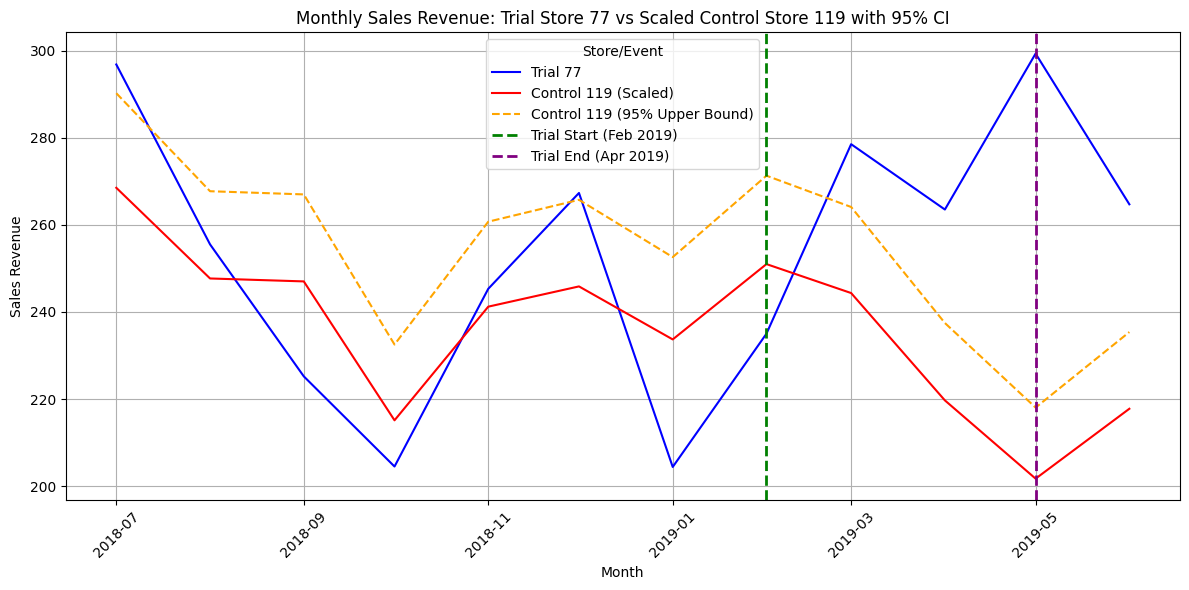

In [19]:
# We need the data for the trial store (77) and its selected control store (119) and include the scaled total sales revenue for the control store.

df_viz_scaled_77_for_plot = df_monthly_sales[
    df_monthly_sales['STORE_NBR'].isin([77, control_store_77])
].copy()

# Convert YEARMONTH to datetime objects for proper plotting of lines and vertical markers
df_viz_scaled_77_for_plot['YEARMONTH'] = pd.to_datetime(df_viz_scaled_77_for_plot['YEARMONTH'], format='%Y%m')

# For the plot, we need the Trial Store 77's 'total_sales_revenue' and the Control Store 119's 'scaled_total_sales_revenue'.
# We can create a new DataFrame or modify the existing one for plotting.

df_plot_sales = df_viz_scaled_77_for_plot[['STORE_NBR', 'YEARMONTH', 'total_sales_revenue', 'scaled_total_sales_revenue']].copy()

# Create a column to indicate the store type for plotting
df_plot_sales['StoreType'] = df_plot_sales['STORE_NBR'].apply(
    lambda x: 'Trial 77' if x == 77 else f'Control {control_store_77} (Scaled)'
)

# Select the relevant value column based on the store type
df_plot_sales['SalesValue'] = df_plot_sales.apply(
    lambda x: x['total_sales_revenue'] if x['STORE_NBR'] == 77 else x['scaled_total_sales_revenue'],
    axis=1
)

# Calculate the standard deviation and degrees of freedom for the pre-trial percentage difference
df_pre_trial_77 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'].isin([77, control_store_77])) &
    (df_monthly_sales['YEARMONTH'] < '201902')
].copy()

pivot_pre_trial = df_pre_trial_77.pivot(
    index='YEARMONTH', columns='STORE_NBR', values='scaled_total_sales_revenue'
).rename(columns={77: 'Trial', control_store_77: 'Control'})

pivot_pre_trial['perc_diff'] = (pivot_pre_trial['Trial'] - pivot_pre_trial['Control']) / pivot_pre_trial['Control']

stdDev = pivot_pre_trial['perc_diff'].std()
num_pre_trial_months = len(pivot_pre_trial)
dof = num_pre_trial_months - 1
t_critical = stats.t.ppf(1 - 0.05 / 2, df=dof)


# Create a column for the upper bound of the 95% confidence interval for the scaled control sales
# Apply this calculation only to the control store's data in the plotting DataFrame

if not pd.isna(stdDev) and stdDev > 0 and num_pre_trial_months >= 2:
    df_plot_sales['ScaledControl_95pc_UpperBound'] = df_plot_sales.apply(
        lambda x: x['SalesValue'] * (1 + t_critical * (stdDev / np.sqrt(num_pre_trial_months)))
        if x['STORE_NBR'] == control_store_77 else None,
        axis=1
    )

    # Now, plot the Trial Store sales, Scaled Control sales, and the 95th percentile upper bound line.
    plt.figure(figsize=(12, 6))

    # Plot Trial Store 77 sales
    sns.lineplot(data=df_plot_sales[df_plot_sales['STORE_NBR'] == 77],
                 x='YEARMONTH', y='SalesValue', color='blue', label='Trial 77')

    # Plot Scaled Control Store 119 sales
    sns.lineplot(data=df_plot_sales[df_plot_sales['STORE_NBR'] == control_store_77],
                 x='YEARMONTH', y='SalesValue', color='red', label=f'Control {control_store_77} (Scaled)')

    # Plot the 95th percentile upper bound for scaled control sales
    sns.lineplot(data=df_plot_sales[df_plot_sales['STORE_NBR'] == control_store_77],
                 x='YEARMONTH', y='ScaledControl_95pc_UpperBound', color='orange', linestyle='--', label=f'Control {control_store_77} (95% Upper Bound)')

    plt.title(f'Monthly Sales Revenue: Trial Store 77 vs Scaled Control Store {control_store_77} with 95% CI')
    plt.xlabel('Month')
    plt.ylabel('Sales Revenue')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Add vertical lines to indicate the trial period (Feb 2019 to Apr 2019)
    # Use pandas datetime objects for the vertical lines
    trial_start_date_plot = pd.to_datetime('201902', format='%Y%m')
    trial_end_date_plot = pd.to_datetime('201905', format='%Y%m') # Mark start of May

    plt.axvline(x=trial_start_date_plot, color='green', linestyle='--', lw=2, label='Trial Start (Feb 2019)')
    plt.axvline(x=trial_end_date_plot, color='purple', linestyle='--', lw=2, label='Trial End (Apr 2019)')
    plt.legend(title='Store/Event')
    plt.tight_layout()
    plt.show()
else:
    print("\nCannot plot confidence interval: Not enough variability or pre-trial months in scaled control data.")

**CONCLUSION:**

The trial conducted at Store 77 had a statistically significant and positive impact on sales during the trial period (Feb–Apr 2019), as trial sales consistently exceeded the upper bound of the control stores 95% confidence interval.

The pre-trial similarity confirms that Store 119 is a good control, and the observed lift can likely be attributed to the trial intervention.

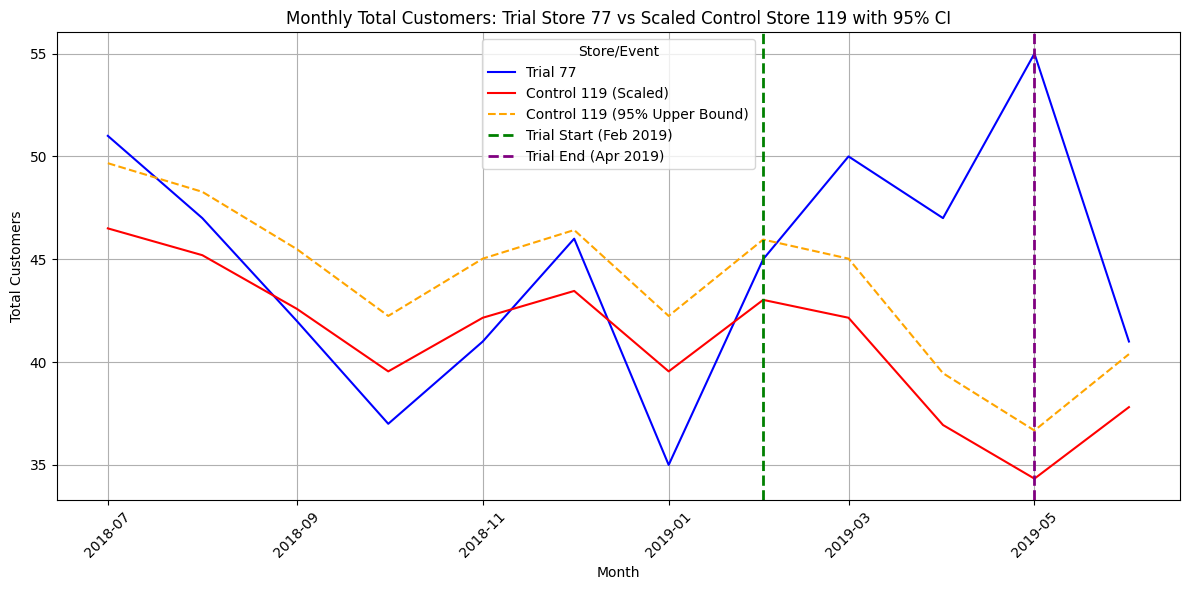

In [22]:
# Filter the DataFrame to include only the trial store (77) and the selected control store (119) based on customers

df_viz_scaled_customers_77 = df_monthly_sales[
    df_monthly_sales['STORE_NBR'].isin([77, control_store_77])
].copy()

# Convert YEARMONTH to datetime objects for proper plotting
df_viz_scaled_customers_77['YEARMONTH'] = pd.to_datetime(df_viz_scaled_customers_77['YEARMONTH'], format='%Y%m')

# Create a column to indicate the store type for plotting
df_plot_customers = df_viz_scaled_customers_77[['STORE_NBR', 'YEARMONTH', 'total_customers', 'scaled_total_customers']].copy()

df_plot_customers['StoreType'] = df_plot_customers['STORE_NBR'].apply(
    lambda x: 'Trial 77' if x == 77 else f'Control {control_store_77} (Scaled)'
)

# Select the relevant value column based on the store type for plotting
df_plot_customers['CustomerCount'] = df_plot_customers.apply(
    lambda x: x['total_customers'] if x['STORE_NBR'] == 77 else x['scaled_total_customers'],
    axis=1
)

# Calculate the standard deviation and degrees of freedom for the pre-trial percentage difference in customers
df_pre_trial_customers_77 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'].isin([77, control_store_77])) &
    (df_monthly_sales['YEARMONTH'] < '201902')
].copy()

pivot_pre_trial_customers = df_pre_trial_customers_77.pivot(
    index='YEARMONTH', columns='STORE_NBR', values='scaled_total_customers'
).rename(columns={77: 'Trial', control_store_77: 'Control'})

pivot_pre_trial_customers['perc_diff'] = (pivot_pre_trial_customers['Trial'] - pivot_pre_trial_customers['Control']) / pivot_pre_trial_customers['Control']

stdDev_customers = pivot_pre_trial_customers['perc_diff'].std()
num_pre_trial_months_customers = len(pivot_pre_trial_customers)
dof_customers = num_pre_trial_months_customers - 1
t_critical_customers = stats.t.ppf(1 - 0.05 / 2, df=dof_customers)


if not pd.isna(stdDev_customers) and stdDev_customers > 0 and num_pre_trial_months_customers >= 2:
    # Create a column for the upper bound of the 95% confidence interval for the scaled control customers
    df_plot_customers['ScaledControl_95pc_UpperBound'] = df_plot_customers.apply(
        lambda x: x['CustomerCount'] * (1 + t_critical_customers * (stdDev_customers / np.sqrt(num_pre_trial_months_customers)))
        if x['STORE_NBR'] == control_store_77 else None,
        axis=1
    )

    # Now, plot the Trial Store customers, Scaled Control customers, and the 95th percentile upper bound line.
    plt.figure(figsize=(12, 6))

    # Plot Trial Store 77 customers
    sns.lineplot(data=df_plot_customers[df_plot_customers['STORE_NBR'] == 77],
                 x='YEARMONTH', y='CustomerCount', color='blue', label='Trial 77')

    # Plot Scaled Control Store 119 customers
    sns.lineplot(data=df_plot_customers[df_plot_customers['STORE_NBR'] == control_store_77],
                 x='YEARMONTH', y='CustomerCount', color='red', label=f'Control {control_store_77} (Scaled)')

    # Plot the 95th percentile upper bound for scaled control customers
    sns.lineplot(data=df_plot_customers[df_plot_customers['STORE_NBR'] == control_store_77],
                 x='YEARMONTH', y='ScaledControl_95pc_UpperBound', color='orange', linestyle='--', label=f'Control {control_store_77} (95% Upper Bound)')

    plt.title(f'Monthly Total Customers: Trial Store 77 vs Scaled Control Store {control_store_77} with 95% CI')
    plt.xlabel('Month')
    plt.ylabel('Total Customers')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Add vertical lines to indicate the trial period
    trial_start_date_plot = pd.to_datetime('201902', format='%Y%m')
    trial_end_date_plot = pd.to_datetime('201905', format='%Y%m') # Mark start of May

    plt.axvline(x=trial_start_date_plot, color='green', linestyle='--', lw=2, label='Trial Start (Feb 2019)')
    plt.axvline(x=trial_end_date_plot, color='purple', linestyle='--', lw=2, label='Trial End (Apr 2019)')

    plt.legend(title='Store/Event')
    plt.tight_layout()
    plt.show()
else:
    print("\nCannot plot confidence interval: Not enough variability or pre-trial months in scaled control data for customers.")

**INSIGHTS**

The uplift in total sales observed during the trial period can be partly attributed to an increase in customer traffic, particularly in March and April 2019.

This implies that the trial strategy was effective in attracting more customers to Store 77.


Selected control store for trial store 86: 138


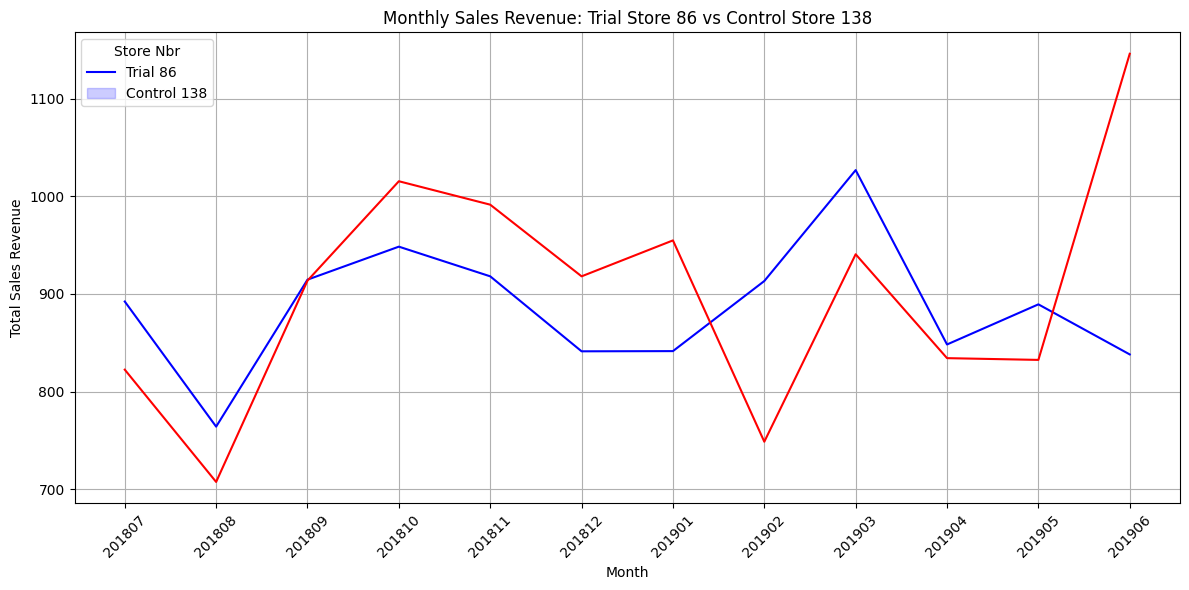

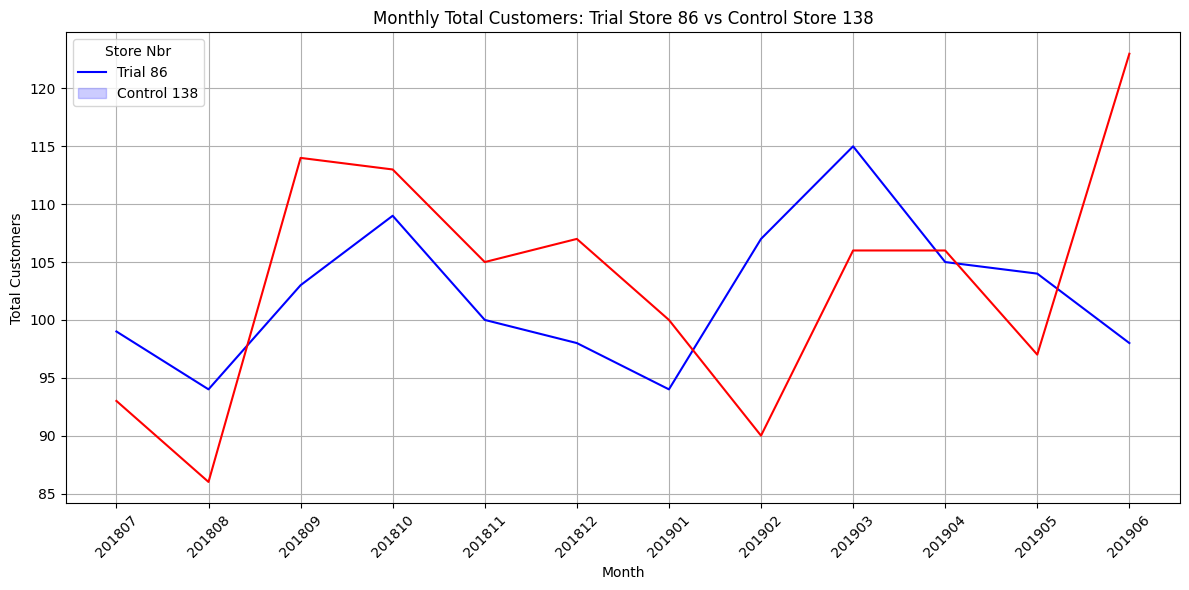

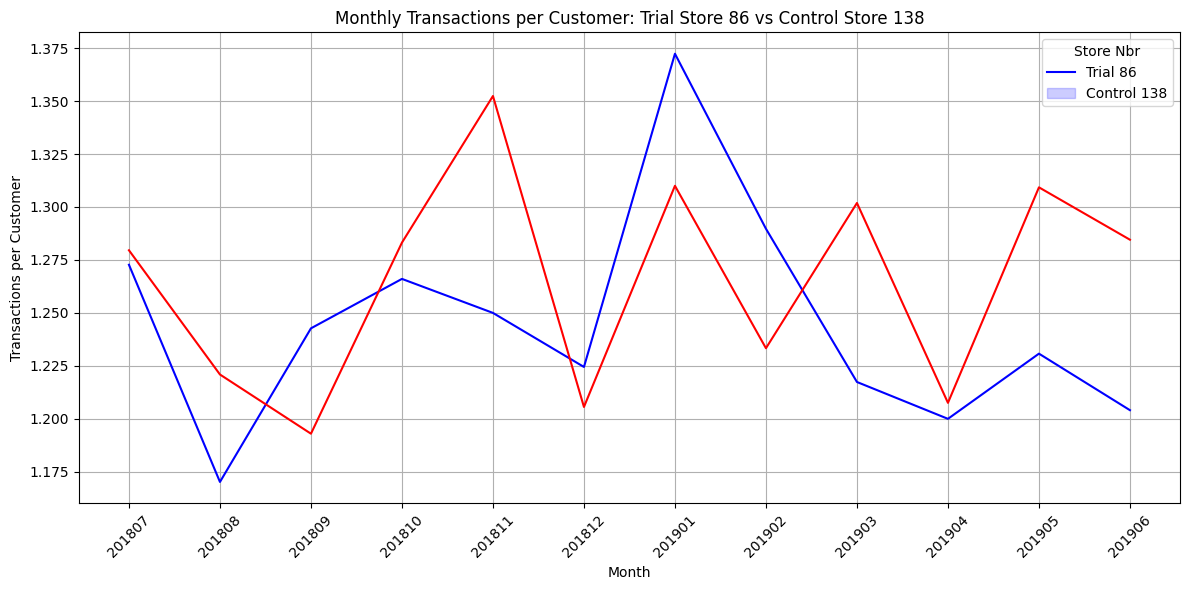

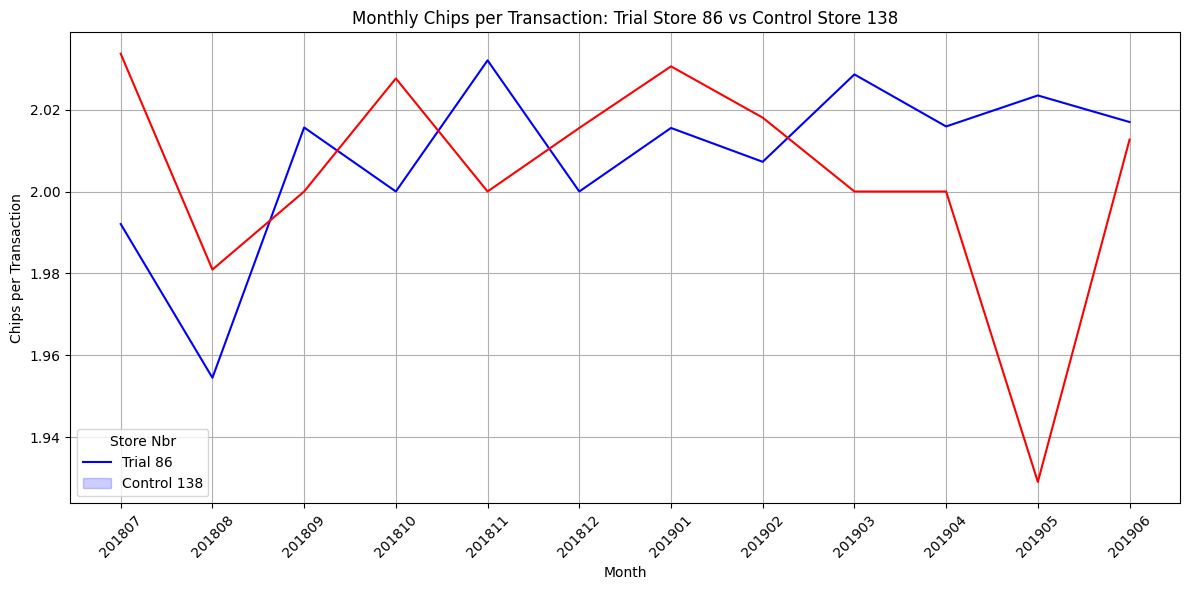

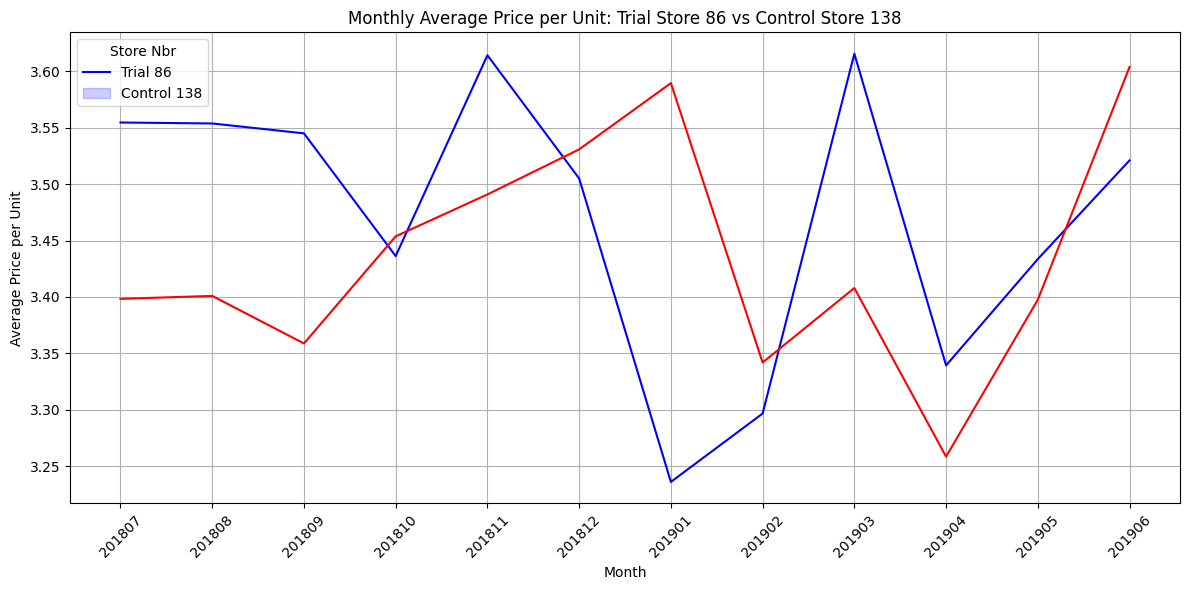

In [23]:
# Calculate the scaling factor based on the ratio of pre-trial total sales revenue between the trial and control stores
# # Filter for the pre-trial period (before Feb 2019)

# Extract the best control store for trial store 86
control_store_86 = best_controls[best_controls['trial_store'] == 86]['control_store'].iloc[0]
print(f"\nSelected control store for trial store 86: {control_store_86}")

# Filter the DataFrame to include only the trial store 86 and its selected control store
df_viz_86 = df_monthly_sales[df_monthly_sales['STORE_NBR'].isin([86, control_store_86])].copy()

# Visual comparison of the selected trial store and its control store for sales revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_86, x='YEARMONTH', y='total_sales_revenue', hue='STORE_NBR',
             palette={86: 'blue', control_store_86: 'red'})
plt.title(f'Monthly Sales Revenue: Trial Store 86 vs Control Store {control_store_86}')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 86', f'Control {control_store_86}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for total customers
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_86, x='YEARMONTH', y='total_customers', hue='STORE_NBR',
             palette={86: 'blue', control_store_86: 'red'})
plt.title(f'Monthly Total Customers: Trial Store 86 vs Control Store {control_store_86}')
plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 86', f'Control {control_store_86}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for transactions per customer
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_86, x='YEARMONTH', y='trans_per_customer', hue='STORE_NBR',
             palette={86: 'blue', control_store_86: 'red'})
plt.title(f'Monthly Transactions per Customer: Trial Store 86 vs Control Store {control_store_86}')
plt.xlabel('Month')
plt.ylabel('Transactions per Customer')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 86', f'Control {control_store_86}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for chips per transaction
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_86, x='YEARMONTH', y='chips_per_trans', hue='STORE_NBR',
             palette={86: 'blue', control_store_86: 'red'})
plt.title(f'Monthly Chips per Transaction: Trial Store 86 vs Control Store {control_store_86}')
plt.xlabel('Month')
plt.ylabel('Chips per Transaction')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 86', f'Control {control_store_86}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for average price per unit
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_86, x='YEARMONTH', y='avg_price_per_unit', hue='STORE_NBR',
             palette={86: 'blue', control_store_86: 'red'})
plt.title(f'Monthly Average Price per Unit: Trial Store 86 vs Control Store {control_store_86}')
plt.xlabel('Month')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 86', f'Control {control_store_86}'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Calculate the scaling factor for Store 86 based on pre-trial sales revenue
df_pre_trial_86 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == 86) &
    (df_monthly_sales['YEARMONTH'] < '201902')
].copy()

df_pre_trial_control_86 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == control_store_86) &
    (df_monthly_sales['YEARMONTH'] < '201902')
].copy()

# Calculate the sum of sales revenue for the pre-trial period
pre_trial_sales_86 = df_pre_trial_86['total_sales_revenue'].sum()
pre_trial_sales_control_86 = df_pre_trial_control_86['total_sales_revenue'].sum()

# Calculate the scaling factor for sales revenue
scaling_factor_86 = pre_trial_sales_86 / pre_trial_sales_control_86

# Create scaled column for sales revenue if it doesn't exist or re-calculate for this control
df_monthly_sales[f'scaled_total_sales_revenue_{control_store_86}'] = df_monthly_sales.apply(
    lambda x: x['total_sales_revenue'] * scaling_factor_86 if x['STORE_NBR'] == control_store_86 else x['total_sales_revenue'],
    axis=1
)

# Calculate scaling factor and scaled columns for total customers for Store 86
pre_trial_customers_86 = df_pre_trial_86['total_customers'].sum()
pre_trial_customers_control_86 = df_pre_trial_control_86['total_customers'].sum()
scaling_factor_customers_86 = pre_trial_customers_86 / pre_trial_customers_control_86

df_monthly_sales[f'scaled_total_customers_{control_store_86}'] = df_monthly_sales.apply(
    lambda x: x['total_customers'] * scaling_factor_customers_86 if x['STORE_NBR'] == control_store_86 else x['total_customers'],
    axis=1
)

# Calculate scaling factor and scaled columns for total units for Store 86
pre_trial_units_86 = df_pre_trial_86['total_units'].sum()
pre_trial_units_control_86 = df_pre_trial_control_86['total_units'].sum()
scaling_factor_units_86 = pre_trial_units_86 / pre_trial_units_control_86

df_monthly_sales[f'scaled_total_units_{control_store_86}'] = df_monthly_sales.apply(
    lambda x: x['total_units'] * scaling_factor_units_86 if x['STORE_NBR'] == control_store_86 else x['total_units'],
    axis=1
)


# Filter the data to the trial period (Feb 2019 to Apr 2019) for both trial (86) and scaled control store
df_trial_period_86 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == 86) &
    (df_monthly_sales['YEARMONTH'] >= '201902') &
    (df_monthly_sales['YEARMONTH'] <= '201904')
].copy()

df_scaled_control_period_86 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == control_store_86) &
    (df_monthly_sales['YEARMONTH'] >= '201902') &
    (df_monthly_sales['YEARMONTH'] <= '201904')
].copy()

# Ensure both dataframes are sorted by YEARMONTH
df_trial_period_86 = df_trial_period_86.sort_values('YEARMONTH').reset_index(drop=True)
df_scaled_control_period_86 = df_scaled_control_period_86.sort_values('YEARMONTH').reset_index(drop=True)

# Calculate the percentage difference for sales revenue during the trial period
percentage_diff_sales_86 = (
    (df_trial_period_86['total_sales_revenue'].sum() - df_scaled_control_period_86[f'scaled_total_sales_revenue_{control_store_86}'].sum()) /
    df_scaled_control_period_86[f'scaled_total_sales_revenue_{control_store_86}'].sum()
) * 100

print(f"\nTotal Sales Revenue during trial period for Trial Store 86: {df_trial_period_86['total_sales_revenue'].sum():.2f}")
print(f"Scaled Total Sales Revenue during trial period for Control Store {control_store_86}: {df_scaled_control_period_86[f'scaled_total_sales_revenue_{control_store_86}'].sum():.2f}")
print(f"Percentage Difference in Total Sales Revenue during trial period: {percentage_diff_sales_86:.2f}%")

# Calculate percentage difference for total customers during the trial period
percentage_diff_customers_86 = (
    (df_trial_period_86['total_customers'].sum() - df_scaled_control_period_86[f'scaled_total_customers_{control_store_86}'].sum()) /
    df_scaled_control_period_86[f'scaled_total_customers_{control_store_86}'].sum()
) * 100

print(f"\nTotal Customers during trial period for Trial Store 86: {df_trial_period_86['total_customers'].sum():.0f}")
print(f"Scaled Total Customers during trial period for Control Store {control_store_86}: {df_scaled_control_period_86[f'scaled_total_customers_{control_store_86}'].sum():.0f}")
print(f"Percentage Difference in Total Customers during trial period: {percentage_diff_customers_86:.2f}%")

# Calculate percentage difference for total units sold during the trial period
percentage_diff_units_86 = (
    (df_trial_period_86['total_units'].sum() - df_scaled_control_period_86[f'scaled_total_units_{control_store_86}'].sum()) /
    df_scaled_control_period_86[f'scaled_total_units_{control_store_86}'].sum()
) * 100

print(f"\nTotal Units during trial period for Trial Store 86: {df_trial_period_86['total_units'].sum():.0f}")
print(f"Scaled Total Units during trial period for Control Store {control_store_86}: {df_scaled_control_period_86[f'scaled_total_units_{control_store_86}'].sum():.0f}")
print(f"Percentage Difference in Total Units during trial period: {percentage_diff_units_86:.2f}%")

# Calculate the average difference for transactions per customer
avg_diff_trans_per_customer_86 = df_trial_period_86['trans_per_customer'].mean() - df_scaled_control_period_86['trans_per_customer'].mean()

print(f"\nAverage Transactions per Customer during trial period for Trial Store 86: {df_trial_period_86['trans_per_customer'].mean():.2f}")
print(f"Average Transactions per Customer during trial period for Control Store {control_store_86}: {df_scaled_control_period_86['trans_per_customer'].mean():.2f}")
print(f"Average Difference in Transactions per Customer during trial period: {avg_diff_trans_per_customer_86:.2f}")


# Calculate the average difference for chips per transaction
avg_diff_chips_per_trans_86 = df_trial_period_86['chips_per_trans'].mean() - df_scaled_control_period_86['chips_per_trans'].mean()

print(f"\nAverage Chips per Transaction during trial period for Trial Store 86: {df_trial_period_86['chips_per_trans'].mean():.2f}")
print(f"Average Chips per Transaction during trial period for Control Store {control_store_86}: {df_scaled_control_period_86['chips_per_trans'].mean():.2f}")
print(f"Average Difference in Chips per Transaction during trial period: {avg_diff_chips_per_trans_86:.2f}")


Total Sales Revenue during trial period for Trial Store 86: 2788.20
Scaled Total Sales Revenue during trial period for Control Store 138: 2442.33
Percentage Difference in Total Sales Revenue during trial period: 14.16%

Total Customers during trial period for Trial Store 86: 327
Scaled Total Customers during trial period for Control Store 138: 293
Percentage Difference in Total Customers during trial period: 11.54%

Total Units during trial period for Trial Store 86: 815
Scaled Total Units during trial period for Control Store 138: 726
Percentage Difference in Total Units during trial period: 12.23%

Average Transactions per Customer during trial period for Trial Store 86: 1.24
Average Transactions per Customer during trial period for Control Store 138: 1.25
Average Difference in Transactions per Customer during trial period: -0.01

Average Chips per Transaction during trial period for Trial Store 86: 2.02
Average Chips per Transaction during trial period for Control Store 138: 2.01
A

In [25]:
def run_t_test(df, trial_store, control_store, metric, alpha=0.05):
    # Pivot the data
    pivot = df[df['STORE_NBR'].isin([trial_store, control_store])].pivot(
        index='YEARMONTH', columns='STORE_NBR', values=f'scaled_{metric}_{control_store}'
    ).rename(columns={trial_store: 'Trial', control_store: 'Control'})

    # Calculate percentage difference
    pivot['perc_diff'] = (pivot['Trial'] - pivot['Control']) / pivot['Control']

    # Pre-trial and trial periods
    pre = pivot[pivot.index.astype(int) < 201902]['perc_diff']
    trial = pivot[(pivot.index.astype(int) >= 201902) & (pivot.index.astype(int) <= 201904)]['perc_diff']

    # Std dev and degrees of freedom
    std = pre.std()
    n = len(pre)
    dof = n - 1

    if std == 0 or n < 2:
        print(f"\n Not enough variation in pre-trial data for {metric.title()} (Store {trial_store}).")
        return None, None, None

    # t-values and critical value
    t_vals = trial / (std / np.sqrt(n))
    t_crit = stats.t.ppf(1 - alpha/2, df=dof)

    # Print results
    print(f"\n T-test Results for {metric.title()} (Store {trial_store}):")
    print(f"  Std Dev: {std:.4f}, DOF: {dof}, t-critical (95%): {t_crit:.4f}")
    for month, t in t_vals.items():
        print(f"  {month}: t = {t:.4f}, Significant? {abs(t) > t_crit}")

    return std, t_crit, n

# Run tests for Store 86
stdDev_86, t_critical_86, num_pre_trial_months_86 = run_t_test(df_monthly_sales, 86, control_store_86, 'total_sales_revenue')
stdDev_customers_86, t_critical_customers_86, num_pre_trial_months_customers_86 = run_t_test(df_monthly_sales, 86, control_store_86, 'total_customers')


 T-test Results for Total_Sales_Revenue (Store 86):
  Std Dev: 0.0845, DOF: 6, t-critical (95%): 2.4469
  201902: t = 8.1544, Significant? True
  201903: t = 4.0050, Significant? True
  201904: t = 1.5827, Significant? False

 T-test Results for Total_Customers (Store 86):
  Std Dev: 0.0757, DOF: 6, t-critical (95%): 2.4469
  201902: t = 7.8561, Significant? True
  201903: t = 4.1112, Significant? True
  201904: t = 0.7136, Significant? False


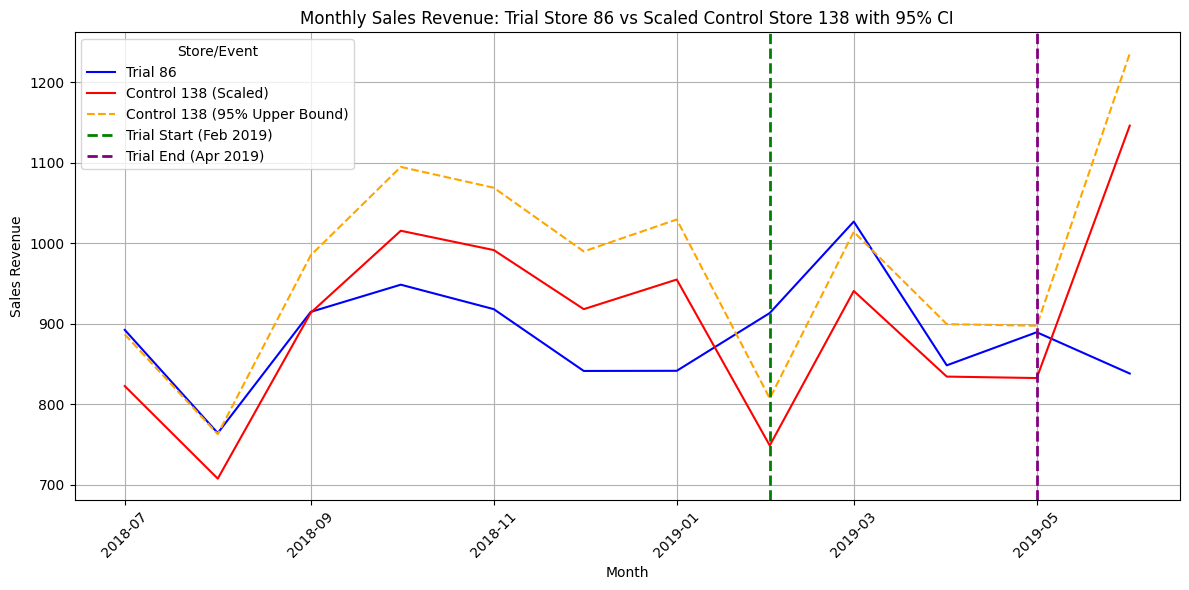

In [26]:
# Plotting Sales Revenue with CI for Store 86
df_viz_scaled_86_for_plot = df_monthly_sales[
    df_monthly_sales['STORE_NBR'].isin([86, control_store_86])
].copy()

df_viz_scaled_86_for_plot['YEARMONTH'] = pd.to_datetime(df_viz_scaled_86_for_plot['YEARMONTH'], format='%Y%m')

df_plot_sales_86 = df_viz_scaled_86_for_plot[[
    'STORE_NBR', 'YEARMONTH', 'total_sales_revenue', 'scaled_total_sales_revenue'
]].copy()

df_plot_sales_86['StoreType'] = df_plot_sales_86['STORE_NBR'].apply(
    lambda x: 'Trial 86' if x == 86 else f'Control {control_store_86} (Scaled)'
)

df_plot_sales_86['SalesValue'] = df_plot_sales_86.apply(
    lambda x: x['total_sales_revenue'] if x['STORE_NBR'] == 86 else x['scaled_total_sales_revenue'],
    axis=1
)

# Calculate the 95th percentile upper bound for the scaled control sales revenue for Store 86
if not pd.isna(stdDev_86) and stdDev_86 > 0 and num_pre_trial_months_86 >= 2:
    df_plot_sales_86['ScaledControl_95pc_UpperBound'] = df_plot_sales_86.apply(
        lambda x: x['SalesValue'] * (1 + t_critical_86 * (stdDev_86 / np.sqrt(num_pre_trial_months_86)))
        if x['STORE_NBR'] == control_store_86 else None,
        axis=1
    )

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_plot_sales_86[df_plot_sales_86['STORE_NBR'] == 86],
                 x='YEARMONTH', y='SalesValue', color='blue', label='Trial 86')
    sns.lineplot(data=df_plot_sales_86[df_plot_sales_86['STORE_NBR'] == control_store_86],
                 x='YEARMONTH', y='SalesValue', color='red', label=f'Control {control_store_86} (Scaled)')
    sns.lineplot(data=df_plot_sales_86[df_plot_sales_86['STORE_NBR'] == control_store_86],
                 x='YEARMONTH', y='ScaledControl_95pc_UpperBound', color='orange', linestyle='--', label=f'Control {control_store_86} (95% Upper Bound)')

    plt.title(f'Monthly Sales Revenue: Trial Store 86 vs Scaled Control Store {control_store_86} with 95% CI')
    plt.xlabel('Month')
    plt.ylabel('Sales Revenue')
    plt.xticks(rotation=45)
    plt.grid(True)

    trial_start_date_plot = pd.to_datetime('201902', format='%Y%m')
    trial_end_date_plot = pd.to_datetime('201905', format='%Y%m')
    plt.axvline(x=trial_start_date_plot, color='green', linestyle='--', lw=2, label='Trial Start (Feb 2019)')
    plt.axvline(x=trial_end_date_plot, color='purple', linestyle='--', lw=2, label='Trial End (Apr 2019)')

    plt.legend(title='Store/Event')
    plt.tight_layout()
    plt.show()



**INSIGHTS**

No consistent increase: Store 86 (blue line) did not show a consistent increase in sales revenue during the trial period (Feb–Apr 2019).

February 2019: Revenue at Store 86 dipped slightly below the control store and its 95% confidence interval upper bound, indicating a statistically significant decline.

March 2019: Though there was an increase in revenue, Store 86 remained within the control stores 95% CI, suggesting no statistically significant difference.

April 2019: Store 86's revenue again fell below the control, with the gap widening as the control increased sharply.

Conclusion: Overall, no statistically significant positive impact of the trial on sales revenue was observed.



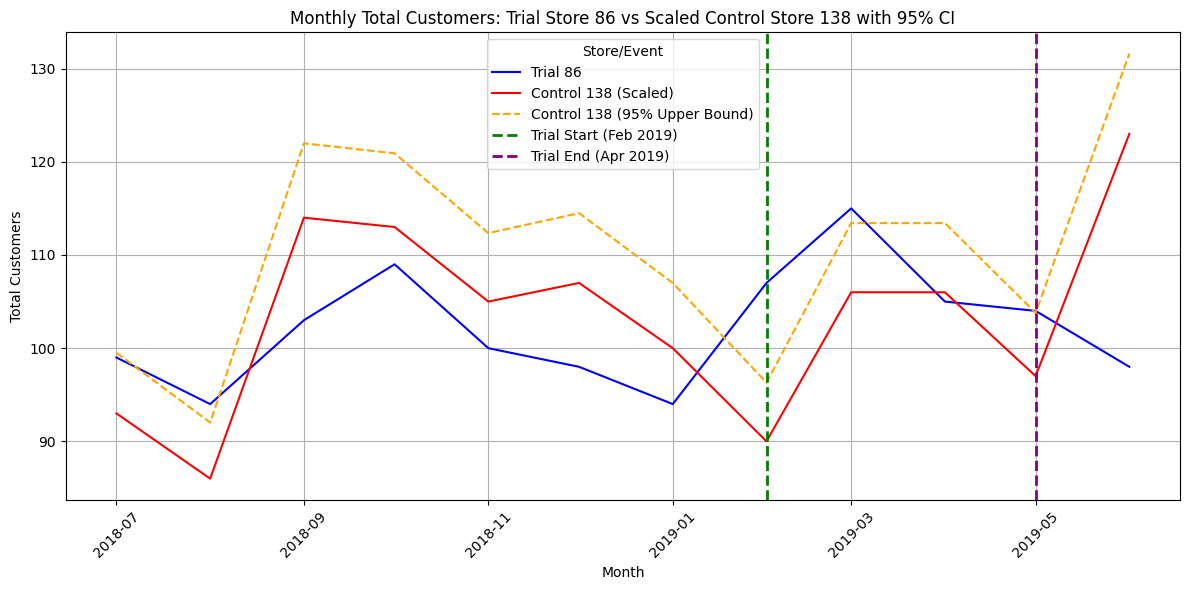

In [27]:
# Plotting Total Customers with CI for Store 86
df_viz_scaled_customers_86 = df_monthly_sales[
    df_monthly_sales['STORE_NBR'].isin([86, control_store_86])
].copy()

df_viz_scaled_customers_86['YEARMONTH'] = pd.to_datetime(df_viz_scaled_customers_86['YEARMONTH'], format='%Y%m')

df_plot_customers_86 = df_viz_scaled_customers_86[[
    'STORE_NBR', 'YEARMONTH', 'total_customers', 'scaled_total_customers'
]].copy()

df_plot_customers_86['StoreType'] = df_plot_customers_86['STORE_NBR'].apply(
    lambda x: 'Trial 86' if x == 86 else f'Control {control_store_86} (Scaled)'
)

df_plot_customers_86['CustomerCount'] = df_plot_customers_86.apply(
    lambda x: x['total_customers'] if x['STORE_NBR'] == 86 else x['scaled_total_customers'],
    axis=1
)

# Calculate the 95th percentile upper bound for the scaled control customer count for Store 86
if not pd.isna(stdDev_customers_86) and stdDev_customers_86 > 0 and num_pre_trial_months_customers_86 >= 2:
    df_plot_customers_86['ScaledControl_95pc_UpperBound'] = df_plot_customers_86.apply(
        lambda row: row['CustomerCount'] * (1 + t_critical_customers_86 * (stdDev_customers_86 / np.sqrt(num_pre_trial_months_customers_86)))
        if row['STORE_NBR'] == control_store_86 else None,
        axis=1
    )

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_plot_customers_86[df_plot_customers_86['STORE_NBR'] == 86],
                 x='YEARMONTH', y='CustomerCount', color='blue', label='Trial 86')
    sns.lineplot(data=df_plot_customers_86[df_plot_customers_86['STORE_NBR'] == control_store_86],
                 x='YEARMONTH', y='CustomerCount', color='red', label=f'Control {control_store_86} (Scaled)')
    sns.lineplot(data=df_plot_customers_86[df_plot_customers_86['STORE_NBR'] == control_store_86],
                 x='YEARMONTH', y='ScaledControl_95pc_UpperBound', color='orange', linestyle='--', label=f'Control {control_store_86} (95% Upper Bound)')

    plt.title(f'Monthly Total Customers: Trial Store 86 vs Scaled Control Store {control_store_86} with 95% CI')
    plt.xlabel('Month')
    plt.ylabel('Total Customers')
    plt.xticks(rotation=45)
    plt.grid(True)

    trial_start_date_plot = pd.to_datetime('201902', format='%Y%m')
    trial_end_date_plot = pd.to_datetime('201905', format='%Y%m')
    plt.axvline(x=trial_start_date_plot, color='green', linestyle='--', lw=2, label='Trial Start (Feb 2019)')
    plt.axvline(x=trial_end_date_plot, color='purple', linestyle='--', lw=2, label='Trial End (Apr 2019)')

    plt.legend(title='Store/Event')
    plt.tight_layout()
    plt.show()


**INSIGHTS**

February 2019: Store 86 showed an increase in customer count, but it was within the control store’s 95% CI, indicating no significant difference.

March 2019: Customer count at Store 86 peaked but still stayed close to or below the upper bound, showing no strong statistical evidence of improvement.

April 2019: Customer numbers dropped slightly again and remained close to the control store.

Conclusion: The customer count did not significantly deviate from the control, indicating no meaningful impact of the trial on attracting more customers.

**RECOMMENDATION**

The trial did not yield statistically significant improvements in sales or customer numbers — expansion is not advised at this stage.

Investigate the notable dip in sales and customers at the start of the trial to identify any external or operational disruptions.

The current approach should be re-evaluated and refined, considering possible improvements in promotional tactics, store experience, or staff engagement.

Conduct qualitative research (e.g., surveys, interviews) to understand customer perception and trial impact beyond numbers.

Redirect efforts toward stores or strategies that have shown positive organic trends or successful past interventions.


Selected control store for trial store 88: 178


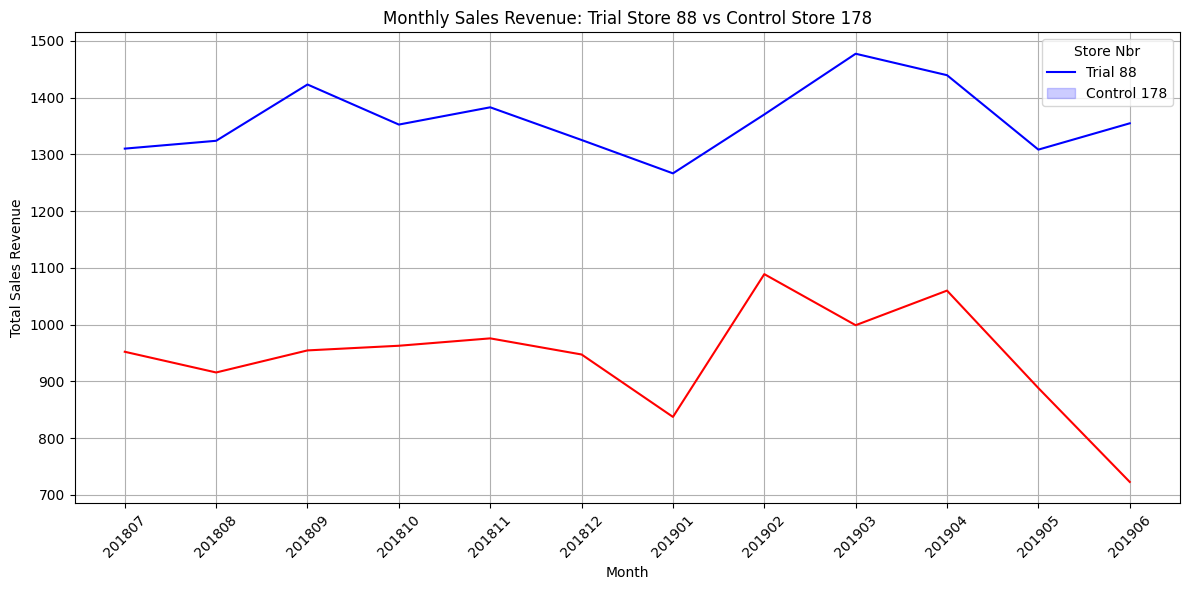

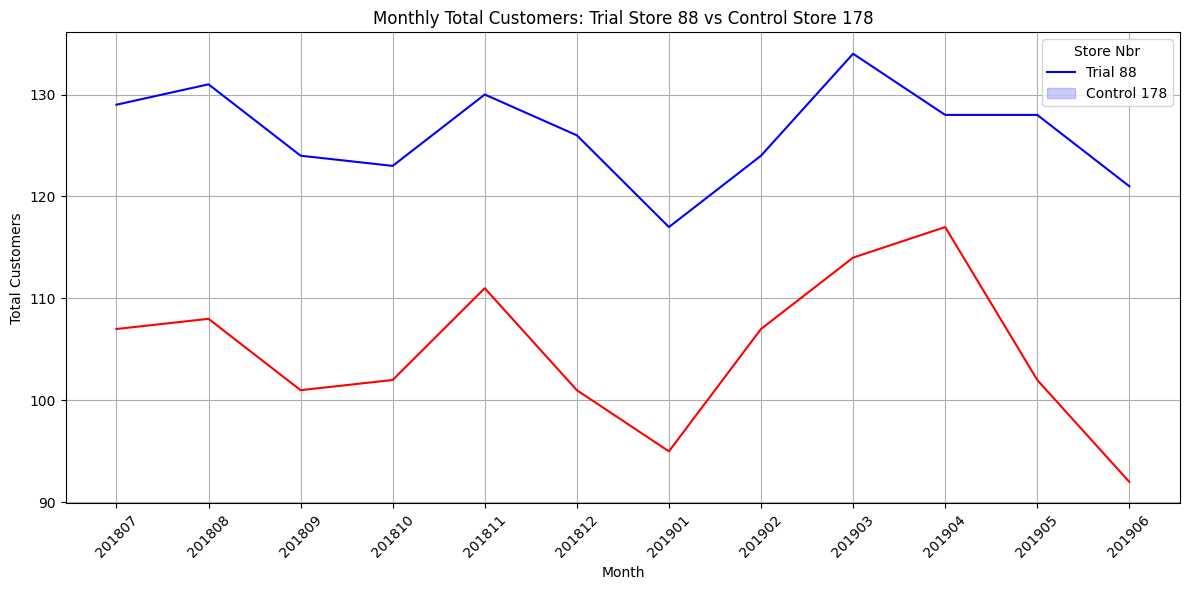

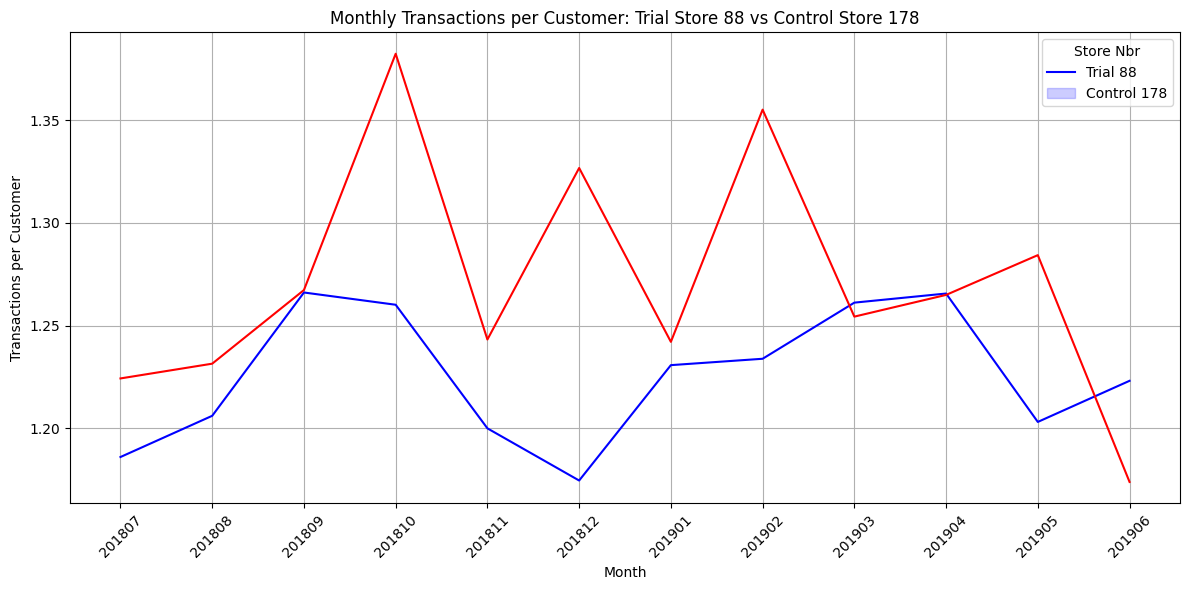

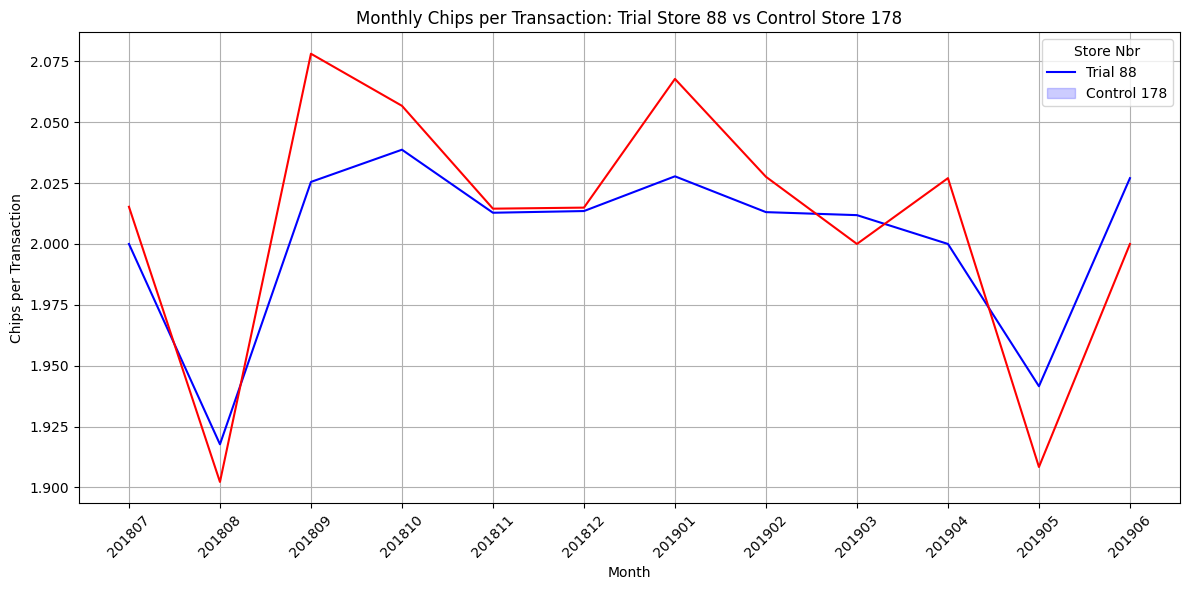

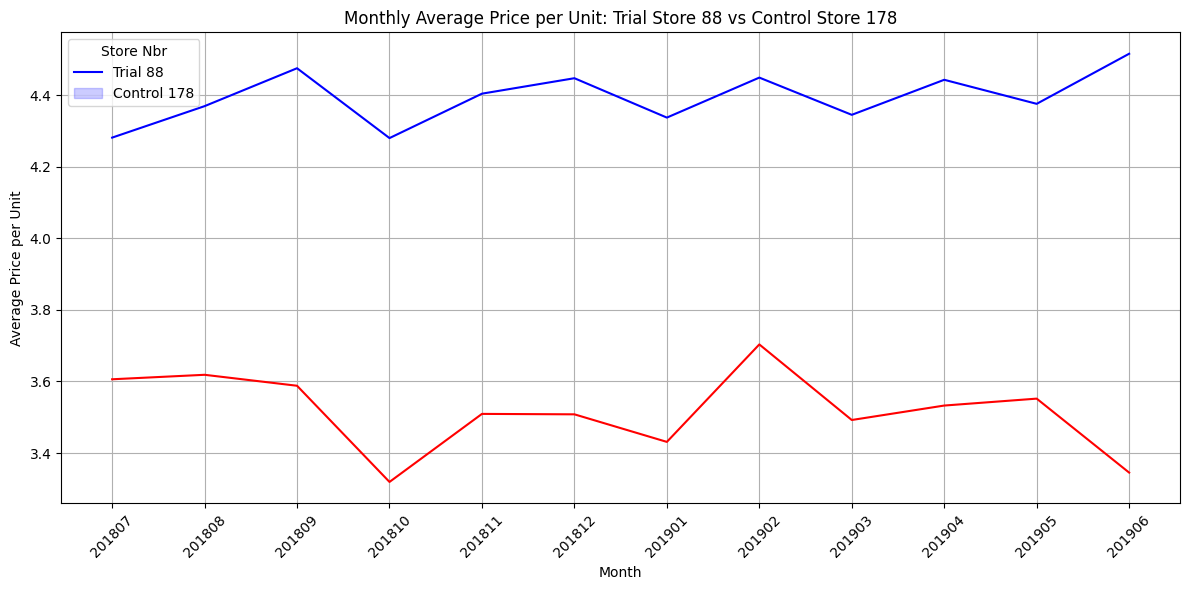

In [28]:
# Extract the best control store for trial store 88
control_store_88 = best_controls[best_controls['trial_store'] == 88]['control_store'].iloc[0]
print(f"\nSelected control store for trial store 88: {control_store_88}")

# Filter the DataFrame to include only the trial store 88 and its selected control store
df_viz_88 = df_monthly_sales[df_monthly_sales['STORE_NBR'].isin([88, control_store_88])].copy()

# Visual comparison of the selected trial store and its control store for sales revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_88, x='YEARMONTH', y='total_sales_revenue', hue='STORE_NBR',
             palette={88: 'blue', control_store_88: 'red'})
plt.title(f'Monthly Sales Revenue: Trial Store 88 vs Control Store {control_store_88}')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 88', f'Control {control_store_88}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for total customers
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_88, x='YEARMONTH', y='total_customers', hue='STORE_NBR',
             palette={88: 'blue', control_store_88: 'red'})
plt.title(f'Monthly Total Customers: Trial Store 88 vs Control Store {control_store_88}')
plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 88', f'Control {control_store_88}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for transactions per customer
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_88, x='YEARMONTH', y='trans_per_customer', hue='STORE_NBR',
             palette={88: 'blue', control_store_88: 'red'})
plt.title(f'Monthly Transactions per Customer: Trial Store 88 vs Control Store {control_store_88}')
plt.xlabel('Month')
plt.ylabel('Transactions per Customer')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 88', f'Control {control_store_88}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for chips per transaction
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_88, x='YEARMONTH', y='chips_per_trans', hue='STORE_NBR',
             palette={88: 'blue', control_store_88: 'red'})
plt.title(f'Monthly Chips per Transaction: Trial Store 88 vs Control Store {control_store_88}')
plt.xlabel('Month')
plt.ylabel('Chips per Transaction')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 88', f'Control {control_store_88}'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual comparison for average price per unit
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_viz_88, x='YEARMONTH', y='avg_price_per_unit', hue='STORE_NBR',
             palette={88: 'blue', control_store_88: 'red'})
plt.title(f'Monthly Average Price per Unit: Trial Store 88 vs Control Store {control_store_88}')
plt.xlabel('Month')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.legend(title='Store Nbr', labels=[f'Trial 88', f'Control {control_store_88}'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Calculate the scaling factor for Store 88 based on pre-trial sales revenue
df_pre_trial_88 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == 88) &
    (df_monthly_sales['YEARMONTH'] < '201902')
].copy()

df_pre_trial_control_88 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == control_store_88) &
    (df_monthly_sales['YEARMONTH'] < '201902')
].copy()

# Calculate the sum of sales revenue for the pre-trial period
pre_trial_sales_88 = df_pre_trial_88['total_sales_revenue'].sum()
pre_trial_sales_control_88 = df_pre_trial_control_88['total_sales_revenue'].sum()

# Calculate the scaling factor for sales revenue
scaling_factor_88 = pre_trial_sales_88 / pre_trial_sales_control_88

# Create scaled column for sales revenue if it doesn't exist or re-calculate for this control
df_monthly_sales[f'scaled_total_sales_revenue_{control_store_88}'] = df_monthly_sales.apply(
    lambda x: x['total_sales_revenue'] * scaling_factor_88 if x['STORE_NBR'] == control_store_88 else x['total_sales_revenue'],
    axis=1
)

# Calculate scaling factor and scaled columns for total customers for Store 88
pre_trial_customers_88 = df_pre_trial_88['total_customers'].sum()
pre_trial_customers_control_88 = df_pre_trial_control_88['total_customers'].sum()
scaling_factor_customers_88 = pre_trial_customers_88 / pre_trial_customers_control_88

df_monthly_sales[f'scaled_total_customers_{control_store_88}'] = df_monthly_sales.apply(
    lambda x: x['total_customers'] * scaling_factor_customers_88 if x['STORE_NBR'] == control_store_88 else x['total_customers'],
    axis=1
)

# Calculate scaling factor and scaled columns for total units for Store 88
pre_trial_units_88 = df_pre_trial_88['total_units'].sum()
pre_trial_units_control_88 = df_pre_trial_control_88['total_units'].sum()
scaling_factor_units_88 = pre_trial_units_88 / pre_trial_units_control_88

df_monthly_sales[f'scaled_total_units_{control_store_88}'] = df_monthly_sales.apply(
    lambda x: x['total_units'] * scaling_factor_units_88 if x['STORE_NBR'] == control_store_88 else x['total_units'],
    axis=1
)


# Filter the data to the trial period (Feb 2019 to Apr 2019) for both trial (88) and scaled control store
df_trial_period_88 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == 88) &
    (df_monthly_sales['YEARMONTH'] >= '201902') &
    (df_monthly_sales['YEARMONTH'] <= '201904')
].copy()

df_scaled_control_period_88 = df_monthly_sales[
    (df_monthly_sales['STORE_NBR'] == control_store_88) &
    (df_monthly_sales['YEARMONTH'] >= '201902') &
    (df_monthly_sales['YEARMONTH'] <= '201904')
].copy()

# Ensure both dataframes are sorted by YEARMONTH
df_trial_period_88 = df_trial_period_88.sort_values('YEARMONTH').reset_index(drop=True)
df_scaled_control_period_88 = df_scaled_control_period_88.sort_values('YEARMONTH').reset_index(drop=True)

# Calculate the percentage difference for sales revenue during the trial period
percentage_diff_sales_88 = (
    (df_trial_period_88['total_sales_revenue'].sum() - df_scaled_control_period_88[f'scaled_total_sales_revenue_{control_store_88}'].sum()) /
    df_scaled_control_period_88[f'scaled_total_sales_revenue_{control_store_88}'].sum()
) * 100

print(f"\nTotal Sales Revenue during trial period for Trial Store 88: {df_trial_period_88['total_sales_revenue'].sum():.2f}")
print(f"Scaled Total Sales Revenue during trial period for Control Store {control_store_88}: {df_scaled_control_period_88[f'scaled_total_sales_revenue_{control_store_88}'].sum():.2f}")
print(f"Percentage Difference in Total Sales Revenue during trial period: {percentage_diff_sales_88:.2f}%")


# Calculate percentage difference for total customers during the trial period
percentage_diff_customers_88 = (
    (df_trial_period_88['total_customers'].sum() - df_scaled_control_period_88[f'scaled_total_customers_{control_store_88}'].sum()) /
    df_scaled_control_period_88[f'scaled_total_customers_{control_store_88}'].sum()
) * 100

print(f"\nTotal Customers during trial period for Trial Store 88: {df_trial_period_88['total_customers'].sum():.0f}")
print(f"Scaled Total Customers during trial period for Control Store {control_store_88}: {df_scaled_control_period_88[f'scaled_total_customers_{control_store_88}'].sum():.0f}")
print(f"Percentage Difference in Total Customers during trial period: {percentage_diff_customers_88:.2f}%")

# Calculate percentage difference for total units sold during the trial period
percentage_diff_units_88 = (
    (df_trial_period_88['total_units'].sum() - df_scaled_control_period_88[f'scaled_total_units_{control_store_88}'].sum()) /
    df_scaled_control_period_88[f'scaled_total_units_{control_store_88}'].sum()
) * 100

print(f"\nTotal Units during trial period for Trial Store 88: {df_trial_period_88['total_units'].sum():.0f}")
print(f"Scaled Total Units during trial period for Control Store {control_store_88}: {df_scaled_control_period_88[f'scaled_total_units_{control_store_88}'].sum():.0f}")
print(f"Percentage Difference in Total Units during trial period: {percentage_diff_units_88:.2f}%")

# Calculate the average difference for transactions per customer
avg_diff_trans_per_customer_88 = df_trial_period_88['trans_per_customer'].mean() - df_scaled_control_period_88['trans_per_customer'].mean()

print(f"\nAverage Transactions per Customer during trial period for Trial Store 88: {df_trial_period_88['trans_per_customer'].mean():.2f}")
print(f"Average Transactions per Customer during trial period for Control Store {control_store_88}: {df_scaled_control_period_88['trans_per_customer'].mean():.2f}")
print(f"Average Difference in Transactions per Customer during trial period: {avg_diff_trans_per_customer_88:.2f}")


# Calculate the average difference for chips per transaction
avg_diff_chips_per_trans_88 = df_trial_period_88['chips_per_trans'].mean() - df_scaled_control_period_88['chips_per_trans'].mean()

print(f"\nAverage Chips per Transaction during trial period for Trial Store 88: {df_trial_period_88['chips_per_trans'].mean():.2f}")
print(f"Average Chips per Transaction during trial period for Control Store {control_store_88}: {df_scaled_control_period_88['chips_per_trans'].mean():.2f}")
print(f"Average Difference in Chips per Transaction during trial period: {avg_diff_chips_per_trans_88:.2f}")




Total Sales Revenue during trial period for Trial Store 88: 4286.80
Scaled Total Sales Revenue during trial period for Control Store 178: 4512.79
Percentage Difference in Total Sales Revenue during trial period: -5.01%

Total Customers during trial period for Trial Store 88: 386
Scaled Total Customers during trial period for Control Store 178: 410
Percentage Difference in Total Customers during trial period: -5.91%

Total Units during trial period for Trial Store 88: 972
Scaled Total Units during trial period for Control Store 178: 1013
Percentage Difference in Total Units during trial period: -4.05%

Average Transactions per Customer during trial period for Trial Store 88: 1.25
Average Transactions per Customer during trial period for Control Store 178: 1.29
Average Difference in Transactions per Customer during trial period: -0.04

Average Chips per Transaction during trial period for Trial Store 88: 2.01
Average Chips per Transaction during trial period for Control Store 178: 2.02


In [30]:
def t_test_analysis(df, trial_store, control_store, metric_col_prefix, trial_start=201902, trial_end=201904, alpha=0.05):
    # Prepare pivot table
    df_sub = df[df['STORE_NBR'].isin([trial_store, control_store])].copy()
    # Use f-string to correctly reference the scaled column name based on the control store number
    pivot = df_sub.pivot(index='YEARMONTH', columns='STORE_NBR', values=f'scaled_{metric_col_prefix}_{control_store}')
    pivot.columns = ['Trial', 'Control']

    # Calculate percentage difference
    pivot['perc_diff'] = (pivot['Trial'] - pivot['Control']) / pivot['Control']

    # Pre-trial stats
    pre_trial = pivot[pivot.index.astype(int) < trial_start]['perc_diff']
    std_dev = pre_trial.std()
    n_pre = len(pre_trial)
    dfree = n_pre - 1

    print(f"\n{metric_col_prefix.title()} - Pre-trial std dev: {std_dev:.4f}, df: {dfree}")

    if std_dev > 0 and n_pre >= 2:
        trial = pivot[(pivot.index.astype(int) >= trial_start) & (pivot.index.astype(int) <= trial_end)]['perc_diff']
        t_vals = trial / (std_dev / np.sqrt(n_pre))
        t_crit = stats.t.ppf(1 - alpha/2, df=dfree)

        print(f"\nT-critical (95% CI): {t_crit:.4f}")
        print(f"\n{metric_col_prefix.title()} - T-test Results (Store {trial_store}):")
        for m, t in t_vals.items():
            print(f"  {m}: t = {t:.4f}, Significant? {abs(t) > t_crit}")

        return std_dev, t_crit, n_pre # Return values for plotting
    else:
        print(f"\nNot enough variability or pre-trial months to run t-test for {metric_col_prefix.title()}.")
        return None, None, None

# Run for Store 88
control_store_88 = best_controls[best_controls['trial_store'] == 88]['control_store'].iloc[0]

stdDev_88, t_critical_88, num_pre_trial_months_88 = t_test_analysis(df_monthly_sales, 88, control_store_88, 'total_sales_revenue')
stdDev_customers_88, t_critical_customers_88, num_pre_trial_months_customers_88 = t_test_analysis(df_monthly_sales, 88, control_store_88, 'total_customers')


Total_Sales_Revenue - Pre-trial std dev: 0.0352, df: 6

T-critical (95% CI): 2.4469

Total_Sales_Revenue - T-test Results (Store 88):
  201902: t = -9.1983, Significant? True
  201903: t = 2.3688, Significant? False
  201904: t = -3.9672, Significant? True

Total_Customers - Pre-trial std dev: 0.0202, df: 6

T-critical (95% CI): 2.4469

Total_Customers - T-test Results (Store 88):
  201902: t = -5.9396, Significant? True
  201903: t = -4.1485, Significant? True
  201904: t = -12.9551, Significant? True


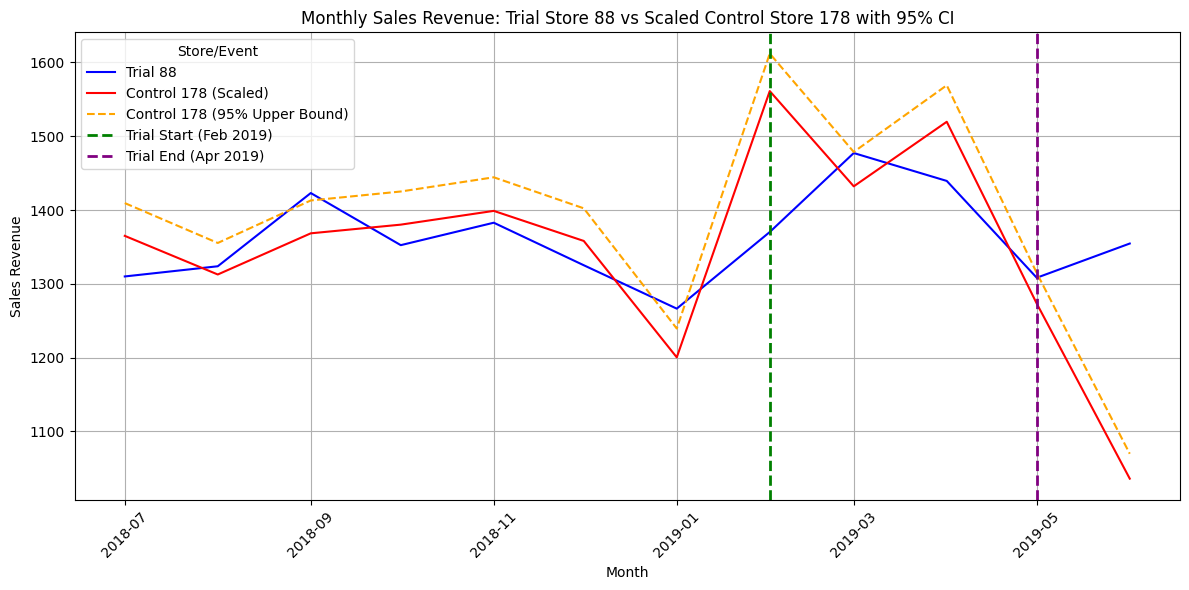

In [31]:
# Plotting Sales Revenue with CI for Store 88
df_viz_scaled_88_for_plot = df_monthly_sales[
    df_monthly_sales['STORE_NBR'].isin([88, control_store_88])
].copy()

df_viz_scaled_88_for_plot['YEARMONTH'] = pd.to_datetime(df_viz_scaled_88_for_plot['YEARMONTH'], format='%Y%m')

df_plot_sales_88 = df_viz_scaled_88_for_plot[[
    'STORE_NBR', 'YEARMONTH', 'total_sales_revenue', f'scaled_total_sales_revenue_{control_store_88}'
]].copy()

df_plot_sales_88['StoreType'] = df_plot_sales_88['STORE_NBR'].apply(
    lambda x: 'Trial 88' if x == 88 else f'Control {control_store_88} (Scaled)'
)

df_plot_sales_88['SalesValue'] = df_plot_sales_88.apply(
    lambda row: row['total_sales_revenue'] if row['STORE_NBR'] == 88 else row[f'scaled_total_sales_revenue_{control_store_88}'],
    axis=1
)

# Calculate the 95th percentile upper bound for the scaled control sales revenue for Store 88
if not pd.isna(stdDev_88) and stdDev_88 > 0 and num_pre_trial_months_88 is not None and num_pre_trial_months_88 >= 2 and t_critical_88 is not None:
    df_plot_sales_88['ScaledControl_95pc_UpperBound'] = df_plot_sales_88.apply(
        lambda row: row['SalesValue'] * (1 + t_critical_88 * (stdDev_88 / np.sqrt(num_pre_trial_months_88)))
        if row['STORE_NBR'] == control_store_88 else None,
        axis=1
    )

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_plot_sales_88[df_plot_sales_88['STORE_NBR'] == 88],
                 x='YEARMONTH', y='SalesValue', color='blue', label='Trial 88')
    sns.lineplot(data=df_plot_sales_88[df_plot_sales_88['STORE_NBR'] == control_store_88],
                 x='YEARMONTH', y='SalesValue', color='red', label=f'Control {control_store_88} (Scaled)')
    sns.lineplot(data=df_plot_sales_88[df_plot_sales_88['STORE_NBR'] == control_store_88],
                 x='YEARMONTH', y='ScaledControl_95pc_UpperBound', color='orange', linestyle='--', label=f'Control {control_store_88} (95% Upper Bound)')

    plt.title(f'Monthly Sales Revenue: Trial Store 88 vs Scaled Control Store {control_store_88} with 95% CI')
    plt.xlabel('Month')
    plt.ylabel('Sales Revenue')
    plt.xticks(rotation=45)
    plt.grid(True)

    trial_start_date_plot = pd.to_datetime('201902', format='%Y%m')
    trial_end_date_plot = pd.to_datetime('201905', format='%Y%m')
    plt.axvline(x=trial_start_date_plot, color='green', linestyle='--', lw=2, label='Trial Start (Feb 2019)')
    plt.axvline(x=trial_end_date_plot, color='purple', linestyle='--', lw=2, label='Trial End (Apr 2019)')

    plt.legend(title='Store/Event')
    plt.tight_layout()
    plt.show()


**INSIGHTS**

Sales revenue increased from February 2019, aligning with the trial start.

Sales remained below the scaled control store (Store 178) throughout the trial period (Feb–Apr 2019).

Revenue did not exceed the 95% confidence interval upper bound, indicating the increase was not statistically significant.

The observed growth in sales is likely due to natural variation, not the trial intervention.

In March and April, the gap widened negatively between Store 88 and the control store.

No evidence of a positive impact from the trial on sales revenue for Store 88.

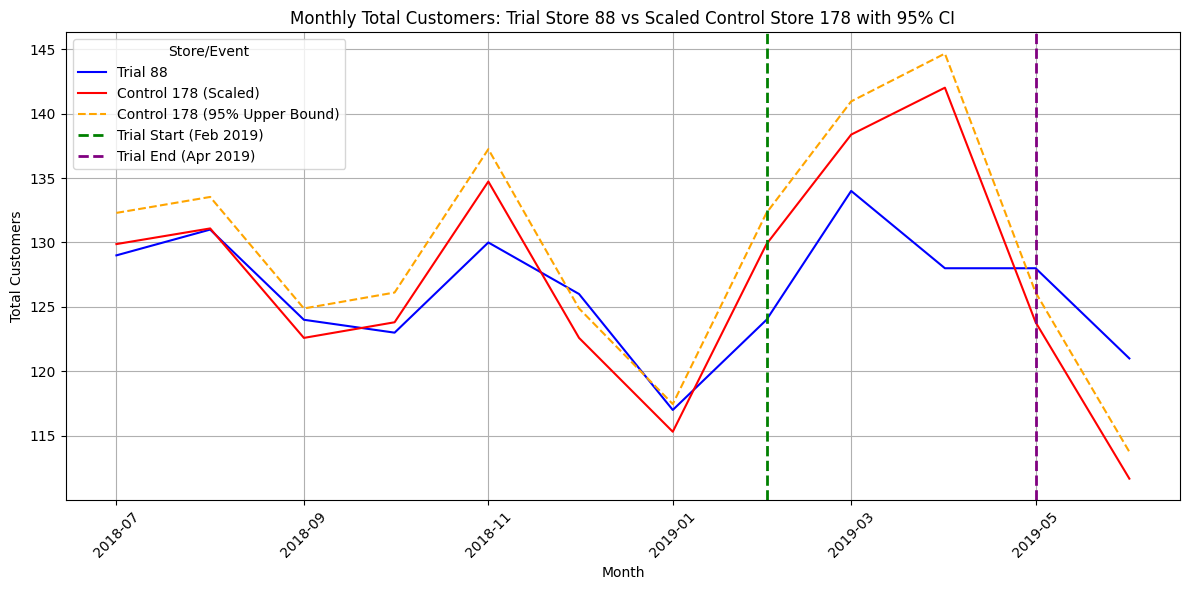

In [32]:
# Plotting Total Customers with CI for Store 88
df_viz_scaled_customers_88 = df_monthly_sales[
    df_monthly_sales['STORE_NBR'].isin([88, control_store_88])
].copy()

df_viz_scaled_customers_88['YEARMONTH'] = pd.to_datetime(df_viz_scaled_customers_88['YEARMONTH'], format='%Y%m')

df_plot_customers_88 = df_viz_scaled_customers_88[[
    'STORE_NBR', 'YEARMONTH', 'total_customers', f'scaled_total_customers_{control_store_88}'
]].copy()

df_plot_customers_88['StoreType'] = df_plot_customers_88['STORE_NBR'].apply(
    lambda x: 'Trial 88' if x == 88 else f'Control {control_store_88} (Scaled)'
)

df_plot_customers_88['CustomerCount'] = df_plot_customers_88.apply(
    lambda row: row['total_customers'] if row['STORE_NBR'] == 88 else row[f'scaled_total_customers_{control_store_88}'],
    axis=1
)

# Calculate the 95th percentile upper bound for the scaled control customer count for Store 88
if not pd.isna(stdDev_customers_88) and stdDev_customers_88 > 0 and num_pre_trial_months_customers_88 >= 2:
    df_plot_customers_88['ScaledControl_95pc_UpperBound'] = df_plot_customers_88.apply(
        lambda row: row['CustomerCount'] * (1 + t_critical_customers_88 * (stdDev_customers_88 / np.sqrt(num_pre_trial_months_customers_88)))
        if row['STORE_NBR'] == control_store_88 else None,
        axis=1
    )

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_plot_customers_88[df_plot_customers_88['STORE_NBR'] == 88],
                 x='YEARMONTH', y='CustomerCount', color='blue', label='Trial 88')
    sns.lineplot(data=df_plot_customers_88[df_plot_customers_88['STORE_NBR'] == control_store_88],
                 x='YEARMONTH', y='CustomerCount', color='red', label=f'Control {control_store_88} (Scaled)')
    sns.lineplot(data=df_plot_customers_88[df_plot_customers_88['STORE_NBR'] == control_store_88],
                 x='YEARMONTH', y='ScaledControl_95pc_UpperBound', color='orange', linestyle='--', label=f'Control {control_store_88} (95% Upper Bound)')

    plt.title(f'Monthly Total Customers: Trial Store 88 vs Scaled Control Store {control_store_88} with 95% CI')
    plt.xlabel('Month')
    plt.ylabel('Total Customers')
    plt.xticks(rotation=45)
    plt.grid(True)

    trial_start_date_plot = pd.to_datetime('201902', format='%Y%m')
    trial_end_date_plot = pd.to_datetime('201905', format='%Y%m')
    plt.axvline(x=trial_start_date_plot, color='green', linestyle='--', lw=2, label='Trial Start (Feb 2019)')
    plt.axvline(x=trial_end_date_plot, color='purple', linestyle='--', lw=2, label='Trial End (Apr 2019)')

    plt.legend(title='Store/Event')
    plt.tight_layout()
    plt.show()


**INSIGHTS**

Customer numbers increased at Store 88 during the trial period (Feb–Apr 2019).

However, Store 88’s customer count remained below both the control store and the upper bound of the 95% confidence interval during the entire trial.

This means the increase in customers was within expected natural variability.

Therefore, the trial did not lead to a statistically significant uplift in customer numbers at Store 88.

Conclusion: The intervention had no meaningful impact on attracting more customers to Store 88.

RECOMMENDATION

The trial did not lead to statistically significant increases in either sales revenue or customer traffic. Expansion to other stores is not recommended.

Review and refine the trial components (e.g. promotions, layout changes, pricing) as the current version did not generate measurable impact.

Conduct qualitative research (e.g. feedback surveys, exit interviews) to understand why customers did not respond strongly to the trial.

Consider running small-scale A/B tests with variations in strategy to identify what factors might drive more meaningful results.

Continue to track sales and customer metrics after the trial to detect any delayed or residual effects.

Redirect time, budget, and focus to stores or initiatives showing more promising early results.

**CONCLUSION**

The trial strategy demonstrated clear success in Store 77, suggesting a targeted and data-backed path for scaled implementation.

However, Stores 86 and 88 highlight the need for careful tailoring and further experimentation.